# Nota: Este proyecto es casi identico al de estados unidos y china; tiene el mismo proceso y se copió el código, solo que se hizo con la data de mexico y chile; solo falta estructurar la metodologia seguida; el bueno es el de EUA  y China

# #0 Entender el problema y analizarlo (hipotetico)

Una institucion gubernamental nos ha pedido ver las tendencias de diferenten enfermedades en diversos paises a lo largo de los años.


# 1.- obtencion, carga y librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('annual_deaths_by_causes.csv')
df.head()

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
0,Afghanistan,AFG,2007,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,...,4490.0,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,2731.0,1424.0,455.0,2277.0,255.0,1973.0,3785.0,...,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,2460.0,1449.0,460.0,2040.0,239.0,1852.0,3874.0,...,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2327.0,1508.0,473.0,1846.0,390.0,1775.0,4170.0,...,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,2254.0,1544.0,482.0,1705.0,94.0,1716.0,4245.0,...,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0


# 2.- Definir el objetivo del proyecto

- El objetivo es investigar cuáles son las causas de muertes más recurrentes en Mexico y Chile y compararlos. Seleccionamos Mexico y Chile, pues son representativos de centro america y sur america, respectivamente. Además ambos son hispanoparlantes.

# 3.- Limpiar y preparar los datos

In [ ]:
df.shape

(7273, 35)

In [ ]:
#todas las columnas previas a la eliminacion
df.columns

Index(['country', 'code', 'year', 'meningitis', 'alzheimer's_diesease',
       'parkinson's_disease', 'nutritional_deficiency', 'malaria', 'drowning',
       'interpersonal_violence', 'maternal_disorders', 'hiv/aids',
       'drug_use_disorders', 'tuberculosis', 'cardiovascular_diseases',
       'lower_respiratory_infections', 'neonatal_disorders',
       'alcohol_use_disorders', 'self_harm', 'exposure_to_forces_of_nature',
       'diarrheal_diseases', 'environmental_heat_and_cold_exposure',
       'neoplasms', 'conflict_and_terrorism', 'diabetes_mellitus',
       'chronic_kidney_disease', 'poisonings', 'protein_energy_malnutrition',
       'terrorism', 'road_injuries', 'chronic_respiratory_diseases',
       'chronic_liver_diseases', 'digestive_diseases',
       'fire_heat_hot_substance', 'acute_hepatitis'],
      dtype='object')

In [ ]:
#¿hay datos nulos?
df.isnull().sum()

country                                    0
code                                    1067
year                                       0
meningitis                               433
alzheimer's_diesease                     433
parkinson's_disease                      433
nutritional_deficiency                   433
malaria                                  433
drowning                                 433
interpersonal_violence                   433
maternal_disorders                       433
hiv/aids                                 433
drug_use_disorders                       433
tuberculosis                             433
cardiovascular_diseases                  433
lower_respiratory_infections             433
neonatal_disorders                       433
alcohol_use_disorders                    433
self_harm                                433
exposure_to_forces_of_nature             433
diarrheal_diseases                       433
environmental_heat_and_cold_exposure     433
neoplasms 

In [ ]:
'''#forma2
df=df.drop(["code", "environmental_heat_and_cold_exposure","hiv/aids", "drug_use_disorders", "neoplasms", "diabetes_mellitus", "chronic_kidney_disease","acute_hepatitis","meningitis","self_harm","neonatal_disorders","poisonings","fire_heat_hot_substance","terrorism"], axis=1)
df.columns'''

Index(['country', 'alzheimer's_diesease', 'parkinson's_disease',
       'nutritional_deficiency', 'malaria', 'drowning',
       'interpersonal_violence', 'maternal_disorders', 'tuberculosis',
       'cardiovascular_diseases', 'lower_respiratory_infections',
       'alcohol_use_disorders', 'exposure_to_forces_of_nature',
       'diarrheal_diseases', 'conflict_and_terrorism',
       'protein_energy_malnutrition', 'road_injuries',
       'chronic_respiratory_diseases', 'chronic_liver_diseases',
       'digestive_diseases'],
      dtype='object')

In [ ]:
'''#fijamos el index
df.set_index('year', inplace=True)'''

In [ ]:
# Seleccionar las deseadas, así:
df = df[["country", "year", "alzheimer's_diesease", "nutritional_deficiency", "cardiovascular_diseases", "drowning", "conflict_and_terrorism" , "road_injuries" , "chronic_respiratory_diseases", "tuberculosis", "diabetes_mellitus", "chronic_liver_diseases", "interpersonal_violence", "lower_respiratory_infections"]]
df

,country,year,alzheimer's_diesease,nutritional_deficiency,cardiovascular_diseases,drowning,conflict_and_terrorism,road_injuries,chronic_respiratory_diseases,tuberculosis,diabetes_mellitus,chronic_liver_diseases,interpersonal_violence,lower_respiratory_infections
0,Afghanistan,2007,1402.0,2488.0,53962.0,2127.0,8220.0,7425.0,7222.0,4995.0,3189.0,3346.0,3657.0,27672.0
1,Afghanistan,2008,1424.0,2277.0,54051.0,1973.0,6895.0,7355.0,7143.0,4790.0,3261.0,3316.0,3785.0,25800.0
2,Afghanistan,2009,1449.0,2040.0,53964.0,1852.0,7617.0,7290.0,7045.0,4579.0,3336.0,3291.0,3874.0,24340.0
3,Afghanistan,2011,1508.0,1846.0,54347.0,1775.0,9142.0,7432.0,6916.0,4259.0,3550.0,3318.0,4170.0,22883.0
4,Afghanistan,2012,1544.0,1705.0,54868.0,1716.0,11350.0,7494.0,6878.0,4122.0,3682.0,3353.0,4245.0,22162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,Zimbabwe,2015,754.0,3019.0,16649.0,770.0,13.0,2373.0,2751.0,11214.0,3176.0,1956.0,1302.0,12974.0
7269,Zimbabwe,2016,767.0,3056.0,16937.0,801.0,6.0,2436.0,2788.0,10998.0,3259.0,1962.0,1342.0,13024.0
7270,Zimbabwe,2017,781.0,2990.0,17187.0,818.0,5.0,2473.0,2818.0,10762.0,3313.0,2007.0,1363.0,12961.0
7271,Zimbabwe,2018,795.0,2918.0,17460.0,825.0,9.0,2509.0,2849.0,10545.0,3381.0,2030.0,1396.0,12860.0


In [ ]:
df.shape

(7273, 14)

In [ ]:
#definimos la data de interés
df.set_index('country', inplace=True)
df_m_c= df.loc[['Mexico', 'Chile']]
df_m_c

,year,alzheimer's_diesease,nutritional_deficiency,cardiovascular_diseases,drowning,conflict_and_terrorism,road_injuries,chronic_respiratory_diseases,tuberculosis,diabetes_mellitus,chronic_liver_diseases,interpersonal_violence,lower_respiratory_infections
country,,,,,,,,,,,,,
Mexico,1990,6577.0,12933.0,72347.0,4485.0,14.0,20634.0,16910.0,7184.0,26772.0,24013.0,16660.0,31114.0
Mexico,1991,6870.0,12725.0,73390.0,4384.0,20.0,20434.0,17171.0,6821.0,27542.0,24522.0,17011.0,29288.0
Mexico,1992,7188.0,12496.0,75338.0,4274.0,10.0,20399.0,17613.0,6753.0,28646.0,25279.0,17253.0,28163.0
Mexico,1993,7534.0,12327.0,77605.0,4140.0,5.0,20270.0,18264.0,6375.0,29958.0,26322.0,17245.0,27289.0
Mexico,1994,7896.0,12043.0,79494.0,3950.0,236.0,19933.0,18858.0,5723.0,31137.0,27107.0,17342.0,26449.0
Mexico,1995,8277.0,11955.0,82593.0,3796.0,82.0,19551.0,19782.0,5401.0,32695.0,27772.0,16967.0,25819.0
Mexico,1996,8591.0,11642.0,84663.0,3653.0,139.0,19367.0,20497.0,5105.0,33486.0,28190.0,16171.0,25031.0
Mexico,1997,8839.0,11176.0,86316.0,3623.0,68.0,19564.0,21052.0,4869.0,34288.0,29117.0,15450.0,23786.0
Mexico,1998,9086.0,10635.0,86888.0,3578.0,107.0,19436.0,21384.0,4584.0,34243.0,29907.0,15374.0,21957.0


In [ ]:
df_m_c.shape

(60, 13)

In [ ]:
df_m_c.value_counts('country')

country
Chile     30
Mexico    30
dtype: int64

In [ ]:
#data de Mexico
df_mex=df_m_c.loc[['Mexico']]
df_mex

,year,alzheimer's_diesease,nutritional_deficiency,cardiovascular_diseases,drowning,conflict_and_terrorism,road_injuries,chronic_respiratory_diseases,tuberculosis,diabetes_mellitus,chronic_liver_diseases,interpersonal_violence,lower_respiratory_infections
country,,,,,,,,,,,,,
Mexico,1990,6577.0,12933.0,72347.0,4485.0,14.0,20634.0,16910.0,7184.0,26772.0,24013.0,16660.0,31114.0
Mexico,1991,6870.0,12725.0,73390.0,4384.0,20.0,20434.0,17171.0,6821.0,27542.0,24522.0,17011.0,29288.0
Mexico,1992,7188.0,12496.0,75338.0,4274.0,10.0,20399.0,17613.0,6753.0,28646.0,25279.0,17253.0,28163.0
Mexico,1993,7534.0,12327.0,77605.0,4140.0,5.0,20270.0,18264.0,6375.0,29958.0,26322.0,17245.0,27289.0
Mexico,1994,7896.0,12043.0,79494.0,3950.0,236.0,19933.0,18858.0,5723.0,31137.0,27107.0,17342.0,26449.0
Mexico,1995,8277.0,11955.0,82593.0,3796.0,82.0,19551.0,19782.0,5401.0,32695.0,27772.0,16967.0,25819.0
Mexico,1996,8591.0,11642.0,84663.0,3653.0,139.0,19367.0,20497.0,5105.0,33486.0,28190.0,16171.0,25031.0
Mexico,1997,8839.0,11176.0,86316.0,3623.0,68.0,19564.0,21052.0,4869.0,34288.0,29117.0,15450.0,23786.0
Mexico,1998,9086.0,10635.0,86888.0,3578.0,107.0,19436.0,21384.0,4584.0,34243.0,29907.0,15374.0,21957.0


In [ ]:
#data de chile
df_chi=df_m_c.loc[['Chile']]
df_chi

,year,alzheimer's_diesease,nutritional_deficiency,cardiovascular_diseases,drowning,conflict_and_terrorism,road_injuries,chronic_respiratory_diseases,tuberculosis,diabetes_mellitus,chronic_liver_diseases,interpersonal_violence,lower_respiratory_infections
country,,,,,,,,,,,,,
Chile,1990,1328.0,190.0,22267.0,496.0,8.0,2104.0,2781.0,993.0,1525.0,3930.0,1156.0,6387.0
Chile,1991,1389.0,188.0,21594.0,489.0,16.0,2075.0,2757.0,873.0,1548.0,3652.0,1107.0,6181.0
Chile,1992,1461.0,189.0,21228.0,499.0,12.0,2111.0,2760.0,803.0,1607.0,3457.0,1013.0,6187.0
Chile,1993,1545.0,206.0,21331.0,530.0,0.0,2205.0,2818.0,776.0,1716.0,3508.0,932.0,6364.0
Chile,1994,1630.0,224.0,21261.0,555.0,0.0,2282.0,2823.0,752.0,1816.0,3672.0,883.0,6453.0
Chile,1995,1725.0,252.0,21582.0,586.0,1.0,2361.0,2901.0,748.0,1933.0,3877.0,878.0,6737.0
Chile,1996,1820.0,292.0,21842.0,601.0,2.0,2425.0,2997.0,730.0,1996.0,3973.0,853.0,6842.0
Chile,1997,1911.0,323.0,21573.0,600.0,0.0,2416.0,3089.0,688.0,1926.0,3911.0,831.0,6534.0
Chile,1998,2009.0,402.0,21895.0,592.0,0.0,2376.0,3322.0,659.0,1965.0,3887.0,849.0,6204.0


# 4.- Exploracion de datos (estadistica descriptiva)

## 4.1.- Para Mexico

In [ ]:
df_mex.describe()

,year,alzheimer's_diesease,nutritional_deficiency,cardiovascular_diseases,drowning,conflict_and_terrorism,road_injuries,chronic_respiratory_diseases,tuberculosis,diabetes_mellitus,chronic_liver_diseases,interpersonal_violence,lower_respiratory_infections
count,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2004.500000,13436.90000,8991.033333,108150.500000,3109.166667,44.433333,19914.433333,25717.333333,3792.300000,44298.866667,32835.966667,18499.066667,21459.066667
std,8.803408,5257.45715,2149.579806,29175.398876,663.897171,64.574300,741.248792,6276.497784,1520.346198,13644.996010,5837.629245,5896.803260,3981.785650
min,1990.000000,6577.00000,6868.000000,72347.000000,2354.000000,0.000000,18599.000000,16910.000000,2510.000000,26772.000000,24013.000000,11859.000000,17191.000000
25%,1997.250000,8900.75000,7279.250000,86438.750000,2496.750000,5.000000,19464.750000,21135.000000,2597.000000,34254.250000,29279.500000,13252.750000,18179.000000
50%,2004.500000,12360.50000,7900.000000,99183.000000,2861.500000,17.000000,19890.000000,24632.000000,2985.500000,41435.500000,31736.500000,16989.000000,20591.500000
75%,2011.750000,17612.50000,11040.750000,127041.250000,3611.750000,60.500000,20391.250000,29995.250000,4797.750000,51745.500000,35245.000000,23067.000000,23487.500000
max,2019.000000,23657.00000,12933.000000,167535.000000,4485.000000,241.000000,21502.000000,38524.000000,7184.000000,73838.000000,46328.000000,31509.000000,31114.000000


In [ ]:
df_mex.shape

(30, 13)

In [ ]:
#data nula de mexico
df_mex.isnull().sum()

year                            0
alzheimer's_diesease            0
nutritional_deficiency          0
cardiovascular_diseases         0
drowning                        0
conflict_and_terrorism          0
road_injuries                   0
chronic_respiratory_diseases    0
tuberculosis                    0
diabetes_mellitus               0
chronic_liver_diseases          0
interpersonal_violence          0
lower_respiratory_infections    0
dtype: int64

## 4.2.- Para Chile

In [ ]:
df_chi.describe()

,year,alzheimer's_diesease,nutritional_deficiency,cardiovascular_diseases,drowning,conflict_and_terrorism,road_injuries,chronic_respiratory_diseases,tuberculosis,diabetes_mellitus,chronic_liver_diseases,interpersonal_violence,lower_respiratory_infections
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2004.500000,2784.266667,454.066667,24072.100000,484.100000,1.466667,2329.300000,4368.733333,608.933333,2550.000000,4227.233333,836.600000,4858.133333
std,8.803408,1032.752998,143.586555,2550.987968,90.164352,3.766763,92.461418,1184.537737,141.216618,668.326887,454.446589,102.250065,1139.979242
min,1990.000000,1328.000000,188.000000,21228.000000,356.000000,0.000000,2075.000000,2757.000000,437.000000,1525.000000,3457.000000,663.000000,3652.000000
25%,1997.250000,1935.500000,342.750000,21916.500000,388.250000,0.000000,2314.000000,3147.250000,484.500000,1972.750000,3893.000000,778.500000,3953.750000
50%,2004.500000,2658.000000,513.000000,23608.500000,492.500000,0.000000,2353.000000,4539.500000,609.000000,2633.500000,4150.500000,799.000000,4228.000000
75%,2011.750000,3549.500000,562.000000,25827.500000,574.250000,1.000000,2387.750000,5400.500000,680.750000,2983.250000,4539.750000,858.250000,6185.500000
max,2019.000000,4804.000000,590.000000,30115.000000,601.000000,16.000000,2438.000000,6389.000000,993.000000,3822.000000,5157.000000,1156.000000,6842.000000


# 5.- Seleccion de las visializaciones

# 6.- Visuzalizaciones

### 6.1.- Hacemos histogramas

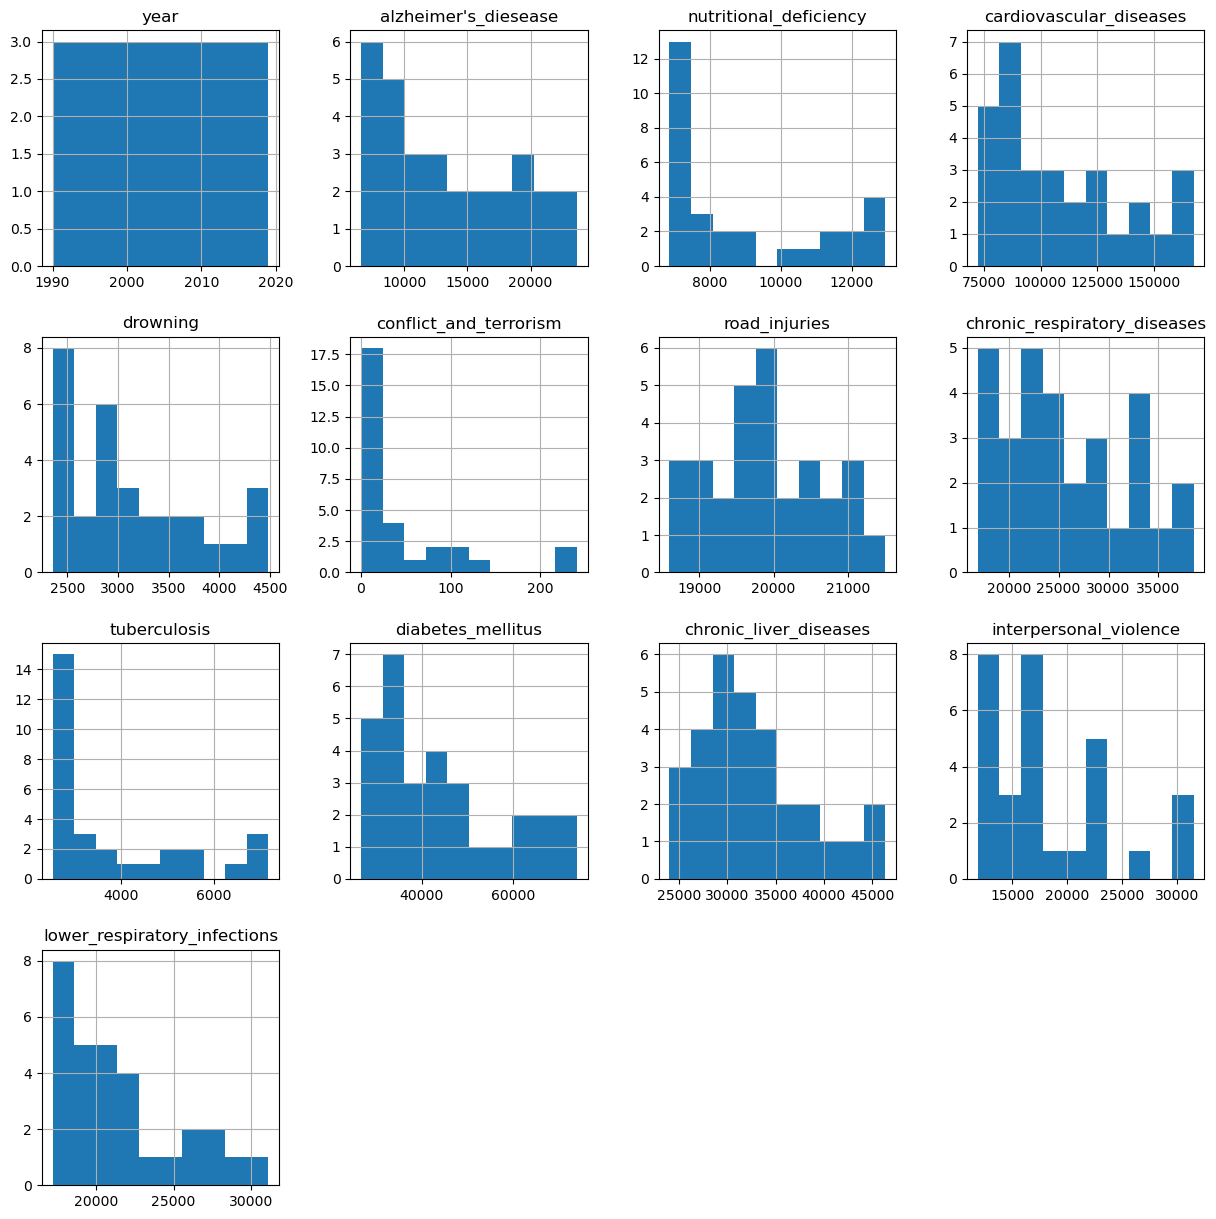

In [ ]:
#mexico
df_mex.hist(figsize=(15, 15))
plt.show()

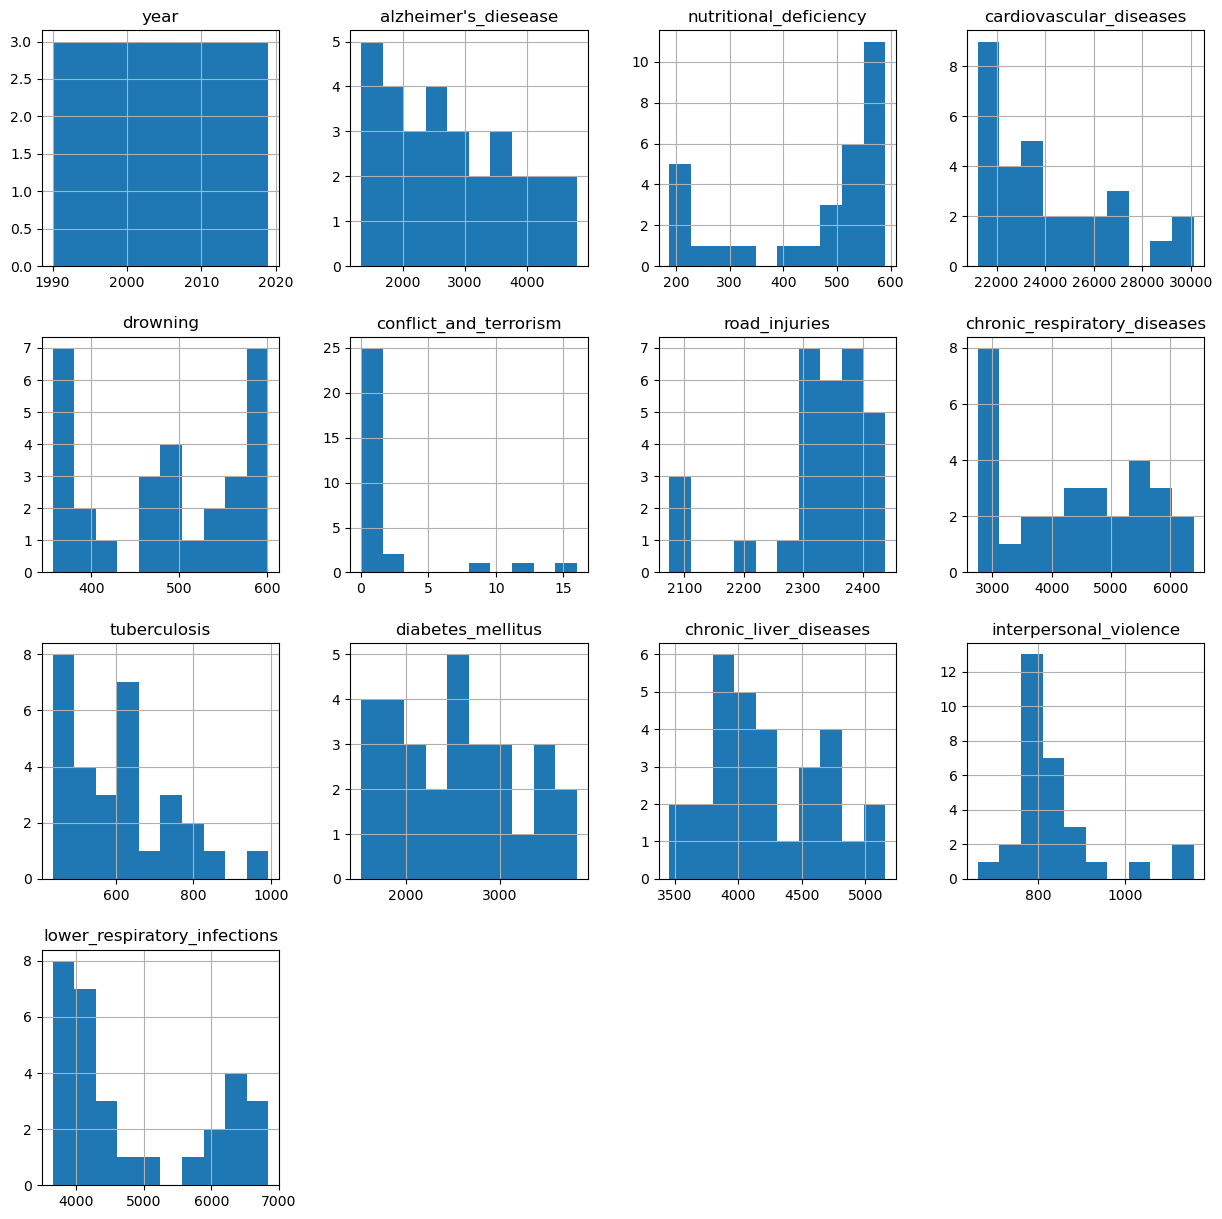

In [ ]:
#chile
df_chi.hist(figsize=(15, 15))
plt.show()

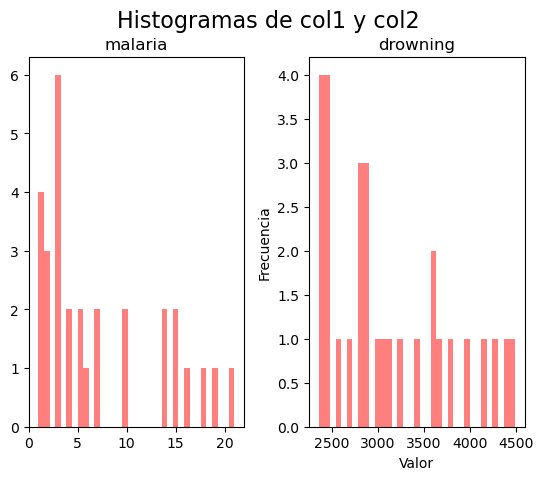

In [ ]:
"""df_mex.hist(column=['',"","",""], color=['red'], alpha=0.5, bins=35, grid=False)
plt.suptitle('Histogramas de enfermedades', fontsize=16)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()"""

Los histogramas no son la mejor manera de visualizar estos datos, pues para cada obsrvacion se tienen frecuencias muy dispersas

### 6.2.- Hacemos boxplot

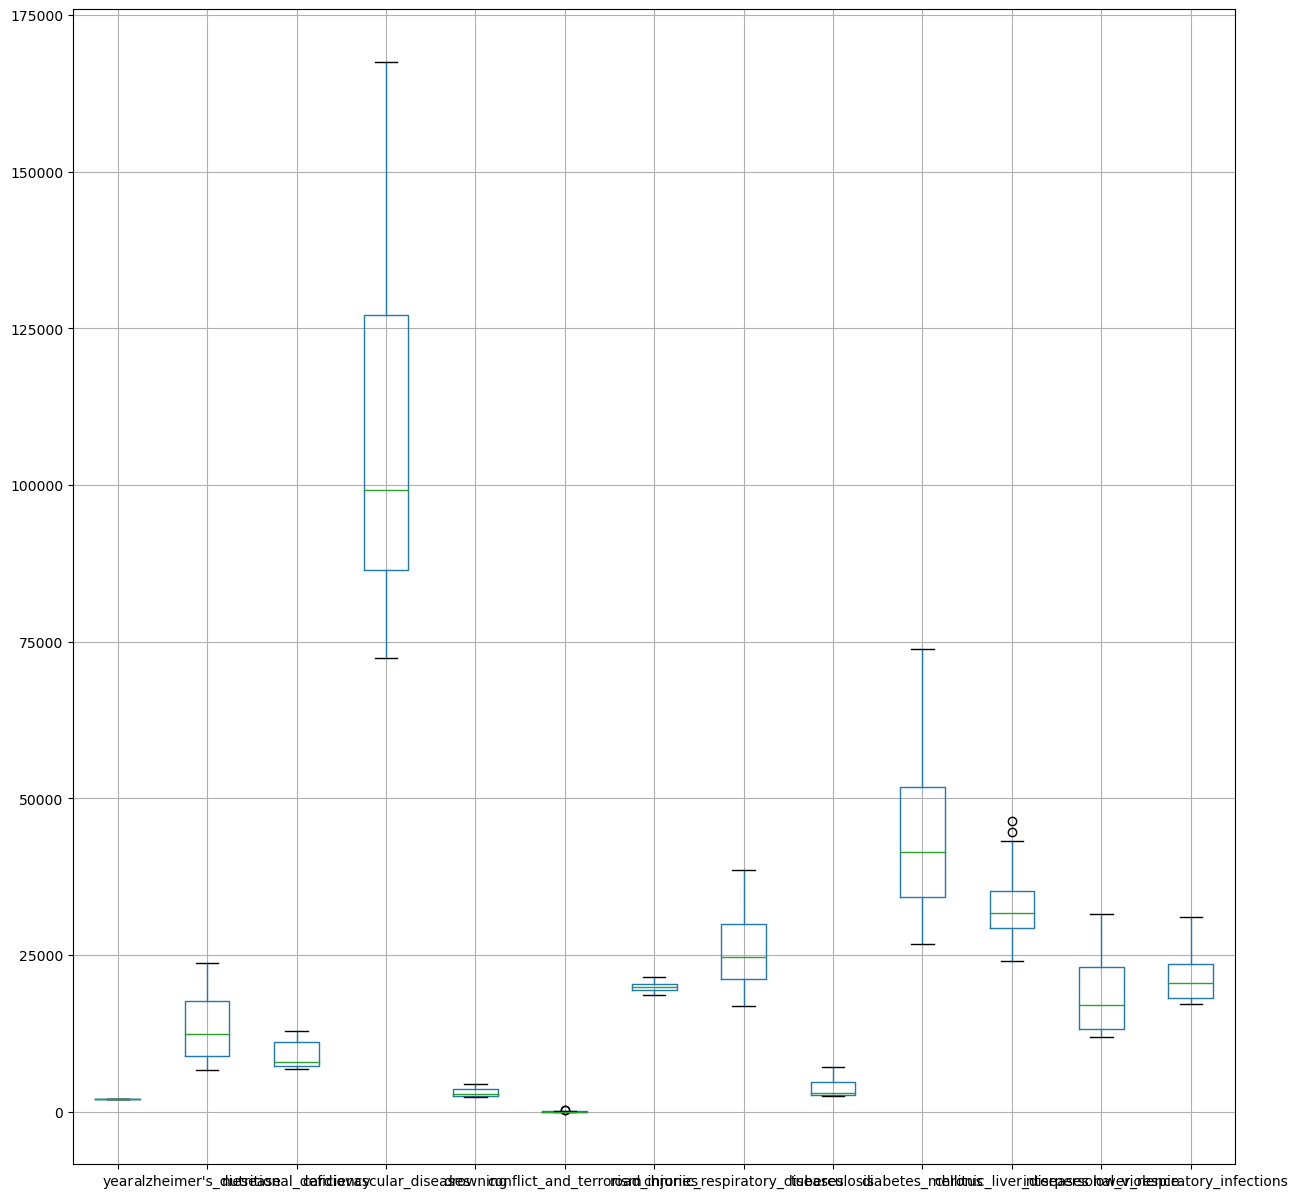

In [ ]:
#mexico
df_mex.boxplot(figsize=(15,15))
plt.show()

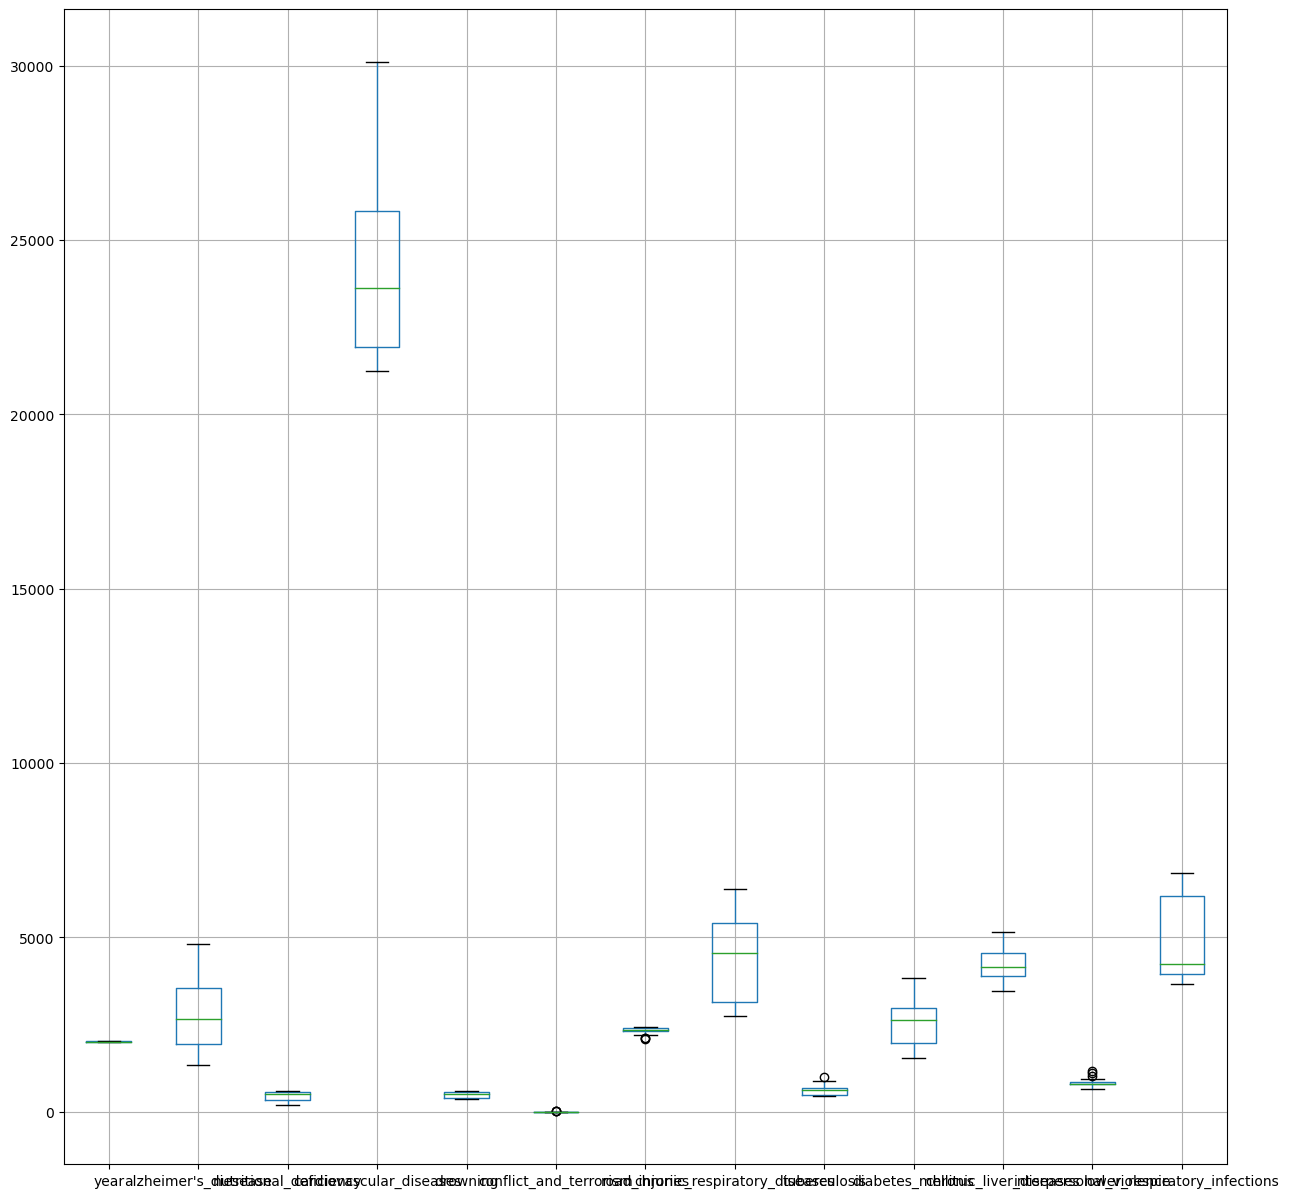

In [ ]:
#chile
df_chi.boxplot(figsize=(15,15))
plt.show()

### 6.3.- Hacemos graficos de dispersion de cada variable respecto al año

In [ ]:
df_mex.columns

Index(['year', 'alzheimer's_diesease', 'nutritional_deficiency',
       'cardiovascular_diseases', 'drowning', 'conflict_and_terrorism',
       'road_injuries', 'chronic_respiratory_diseases', 'tuberculosis',
       'diabetes_mellitus', 'chronic_liver_diseases', 'interpersonal_violence',
       'lower_respiratory_infections'],
      dtype='object')

In [ ]:
df_mex.head(2)

,year,alzheimer's_diesease,nutritional_deficiency,cardiovascular_diseases,drowning,conflict_and_terrorism,road_injuries,chronic_respiratory_diseases,tuberculosis,diabetes_mellitus,chronic_liver_diseases,interpersonal_violence,lower_respiratory_infections
country,,,,,,,,,,,,,
Mexico,1990,6577.0,12933.0,72347.0,4485.0,14.0,20634.0,16910.0,7184.0,26772.0,24013.0,16660.0,31114.0
Mexico,1991,6870.0,12725.0,73390.0,4384.0,20.0,20434.0,17171.0,6821.0,27542.0,24522.0,17011.0,29288.0


#### 6.3.1.- Para Mexico

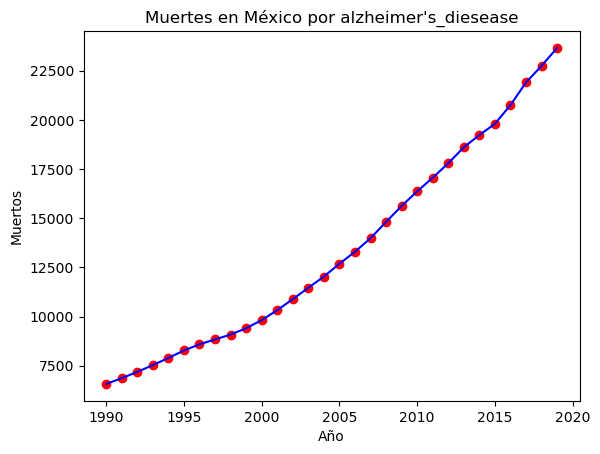

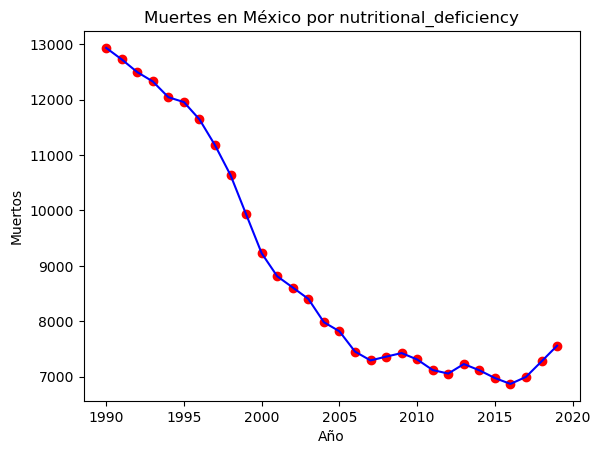

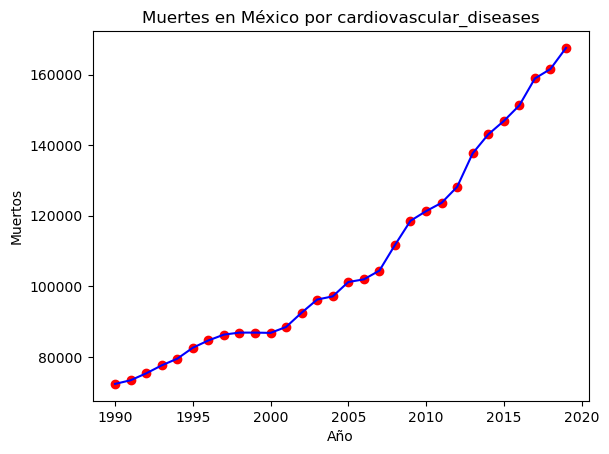

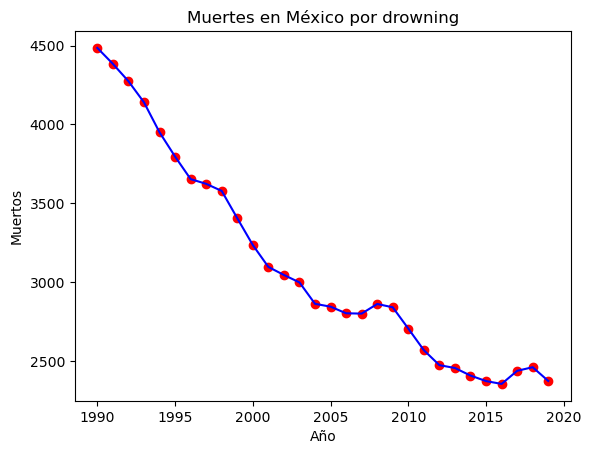

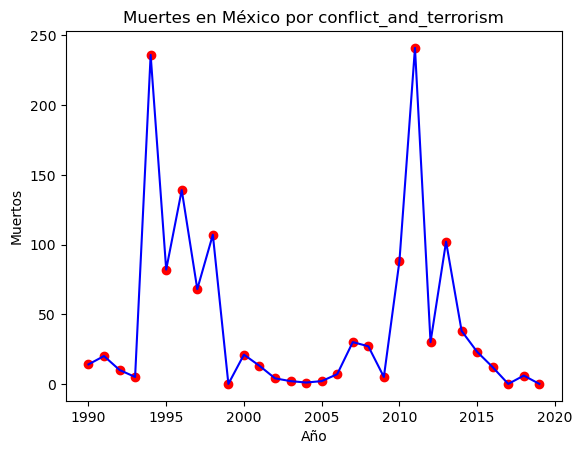

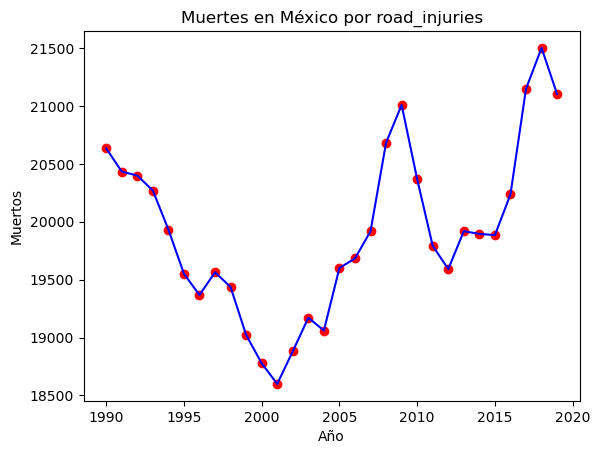

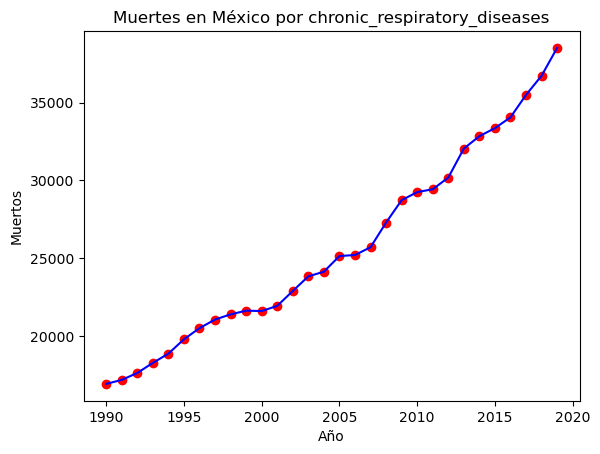

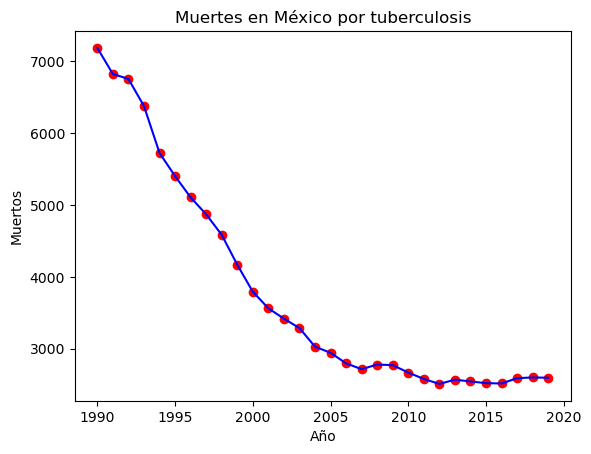

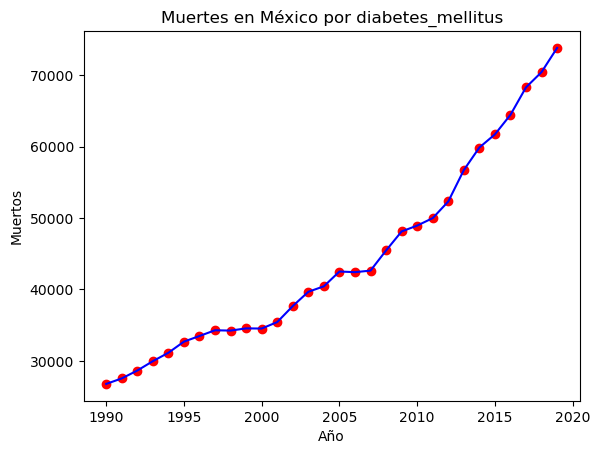

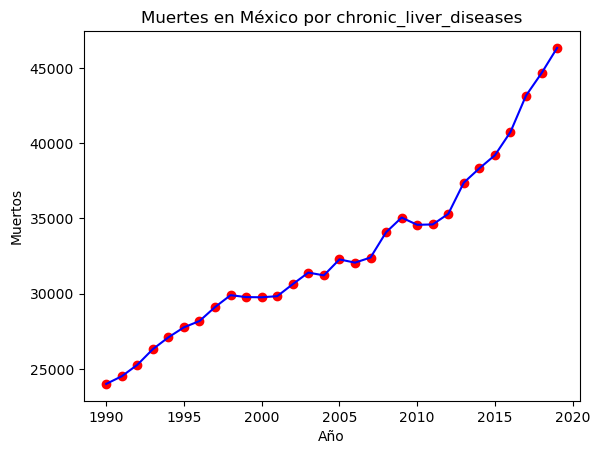

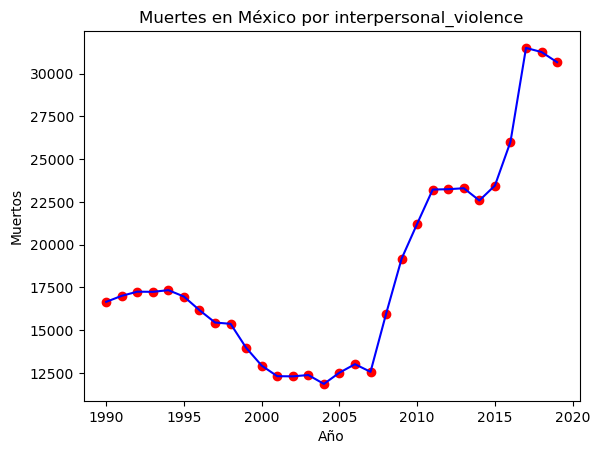

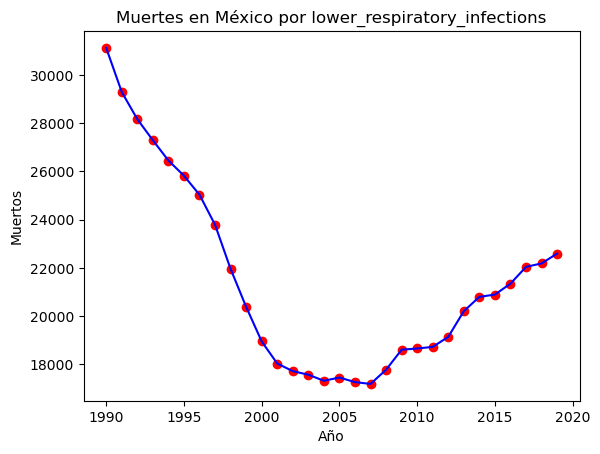

In [ ]:
#Graficos para Mexico

# Lista de valores de i
i_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Lista de valores de r
r_values = ["alzheimer's_diesease", 'nutritional_deficiency', 'cardiovascular_diseases', 'drowning', "conflict_and_terrorism", "road_injuries", "chronic_respiratory_diseases", "tuberculosis", "diabetes_mellitus", "chronic_liver_diseases", "interpersonal_violence", "lower_respiratory_infections"]

# Iteramos sobre los valores de i y r
for i, r in zip(i_values, r_values):
    # Seleccionamos los datos correspondientes
    x_data = df_mex.iloc[:, [0]]
    y_data = df_mex.iloc[:, [i]]

    # Graficamos el gráfico de dispersión
    plt.plot(x_data, y_data, color='blue')
    plt.scatter(x_data, y_data, color='red')
    plt.title(f'Muertes en México por {r}')
    plt.xlabel('Año')
    plt.ylabel('Muertos')
    plt.show()

### note cómo ahorramos mucho codigo utilizando un bucle

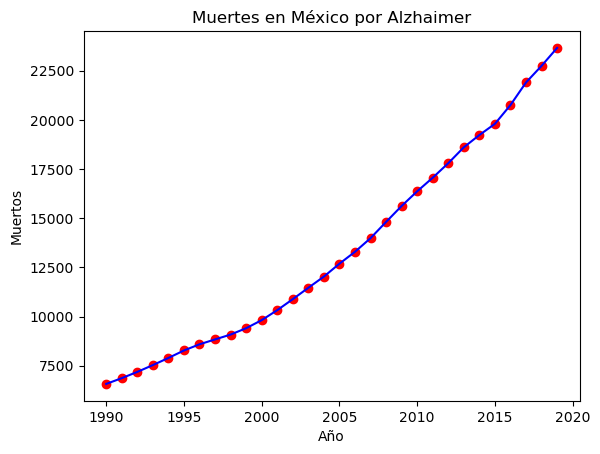

In [ ]:
#grafico 1
#definir variables para alzheimer's_diesease
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [1]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en México por Alzhaimer')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

In [ ]:
#grafico 1
#definir variables para alzheimer's_diesease
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [1]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en México por Alzhaimer')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 2
#definir variables para  nutritional_deficiency
x2_m = df_mex.iloc[:, [0]]
y2_m = df_mex.iloc[:, [2]]

# hacemos una primera comparacion con la variable
plt.plot(x2_m,y2_m, color='blue')
plt.scatter(x2_m , y2_m, color='red')
plt.title('Muertes en México por deficiencia nutricional')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 3
#definir variables para cardiovascular_diseases
x3_m = df_mex.iloc[:, [0]]
y3_m = df_mex.iloc[:, [3]]

# hacemos una primera comparacion con la variable
plt.plot(x3_m,y3_m, color='blue')
plt.scatter(x3_m , y3_m, color='red')
plt.title('Muertes en México por enfermedades cardiovasculares')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 4
#definir variables para drowning
x4_m = df_mex.iloc[:, [0]]
y4_m = df_mex.iloc[:, [4]]

# hacemos una primera comparacion con la variable
plt.plot(x4_m,y4_m, color='blue')
plt.scatter(x4_m , y4_m, color='red')
plt.title('Muertes en México por ahogamiento')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 5
#definir variables para 	conflict_and_terrorism
x5_m = df_mex.iloc[:, [0]]
y5_m = df_mex.iloc[:, [5]]

# hacemos una primera comparacion con la variable
plt.plot(x5_m,y5_m, color='blue')
plt.scatter(x5_m , y5_m, color='red')
plt.title('Muertes en México por conflictos y terrorismo')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 6
#definir variables para road_injuries
x6_m = df_mex.iloc[:, [0]]
y6_m = df_mex.iloc[:, [6]]

# hacemos una primera comparacion con la variable
plt.plot(x6_m,y6_m, color='blue')
plt.scatter(x6_m , y6_m, color='red')
plt.title('Muertes en México por accidentes de carretera')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 7
#definir variables para 	chronic_respiratory_diseases
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [7]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en México por enfermedades cronicas respitatorias')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 8
#definir variables para 	tuberculosis
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [8]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en México por tuberculosis')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 9
#definir variables para 	diabetes_mellitus
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [9]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en México por diabetes')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 10
#definir variables para 	chronic_liver_diseases
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [10]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en México por enferemdades cronicas del higado')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 11 esta repetida, se me fue:(
#definir variables para 	interpersonal_violence
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [11]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en México por violencia interpersonal')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 12
#definir variables para 	lower_respiratory_infections
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [12]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en México por infeccion respiratoria baja')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

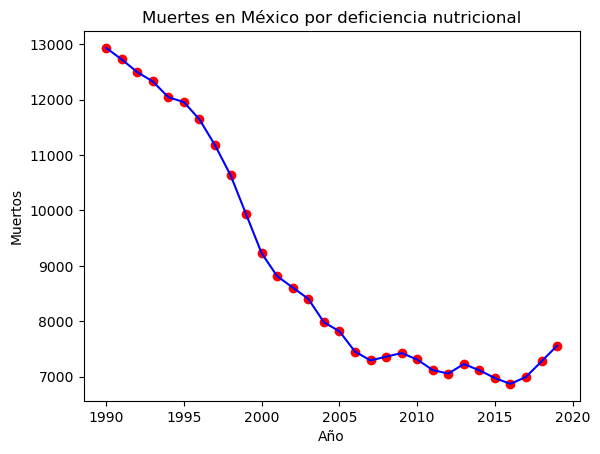

In [ ]:
#grafico 2
#definir variables para  nutritional_deficiency
x2_m = df_mex.iloc[:, [0]]
y2_m = df_mex.iloc[:, [2]]

# hacemos una primera comparacion con la variable
plt.plot(x2_m,y2_m, color='blue')
plt.scatter(x2_m , y2_m, color='red')
plt.title('Muertes en México por deficiencia nutricional')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

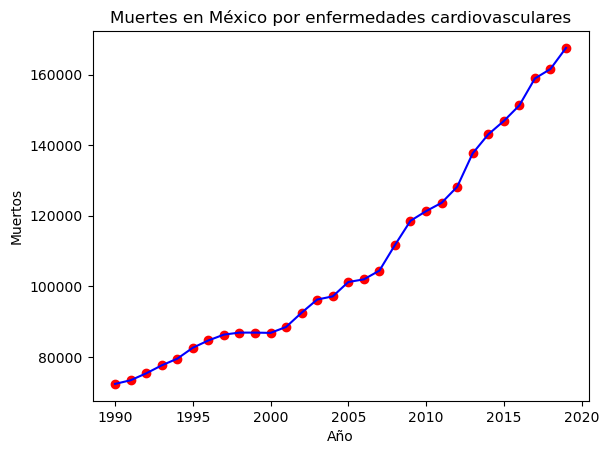

In [ ]:
#grafico 3
#definir variables para cardiovascular_diseases
x3_m = df_mex.iloc[:, [0]]
y3_m = df_mex.iloc[:, [3]]

# hacemos una primera comparacion con la variable
plt.plot(x3_m,y3_m, color='blue')
plt.scatter(x3_m , y3_m, color='red')
plt.title('Muertes en México por enfermedades cardiovasculares')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

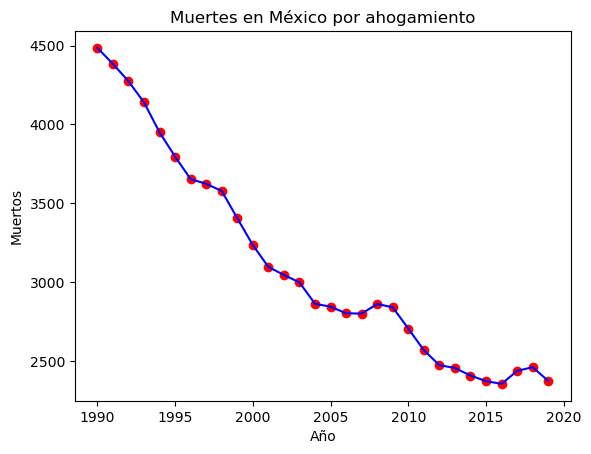

In [ ]:
#grafico 4
#definir variables para drowning
x4_m = df_mex.iloc[:, [0]]
y4_m = df_mex.iloc[:, [4]]

# hacemos una primera comparacion con la variable
plt.plot(x4_m,y4_m, color='blue')
plt.scatter(x4_m , y4_m, color='red')
plt.title('Muertes en México por ahogamiento')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

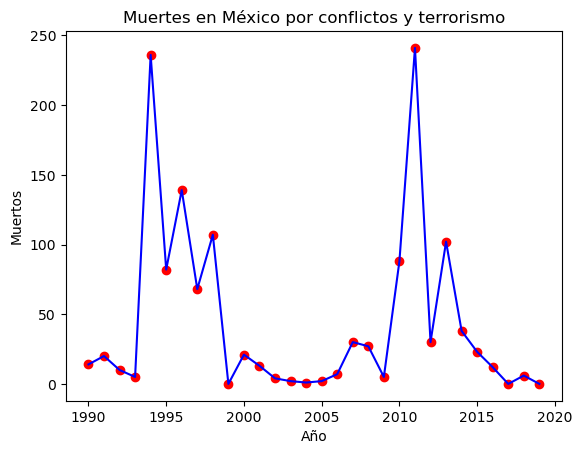

In [ ]:
#grafico 5
#definir variables para 	conflict_and_terrorism
x5_m = df_mex.iloc[:, [0]]
y5_m = df_mex.iloc[:, [5]]

# hacemos una primera comparacion con la variable
plt.plot(x5_m,y5_m, color='blue')
plt.scatter(x5_m , y5_m, color='red')
plt.title('Muertes en México por conflictos y terrorismo')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

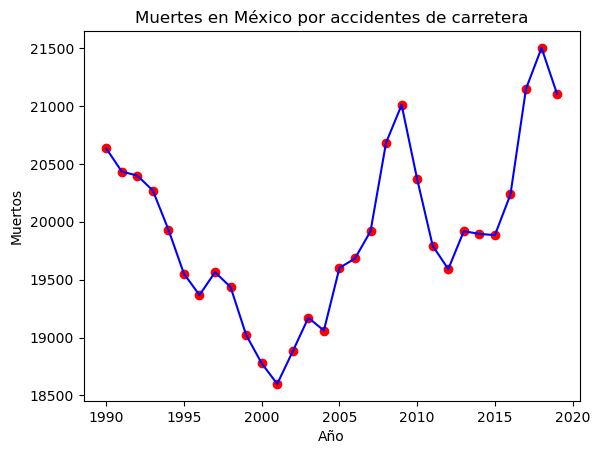

In [ ]:
#grafico 6
#definir variables para road_injuries
x6_m = df_mex.iloc[:, [0]]
y6_m = df_mex.iloc[:, [6]]

# hacemos una primera comparacion con la variable
plt.plot(x6_m,y6_m, color='blue')
plt.scatter(x6_m , y6_m, color='red')
plt.title('Muertes en México por accidentes de carretera')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

aqui me di cuenta que no hay que catalogar a las variables nuevamente, pues se definen con el iloc,

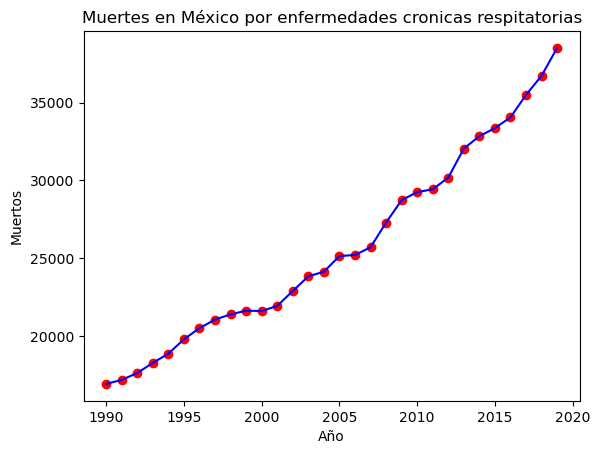

In [ ]:
#grafico 7
#definir variables para 	chronic_respiratory_diseases
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [7]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en México por enfermedades cronicas respitatorias')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

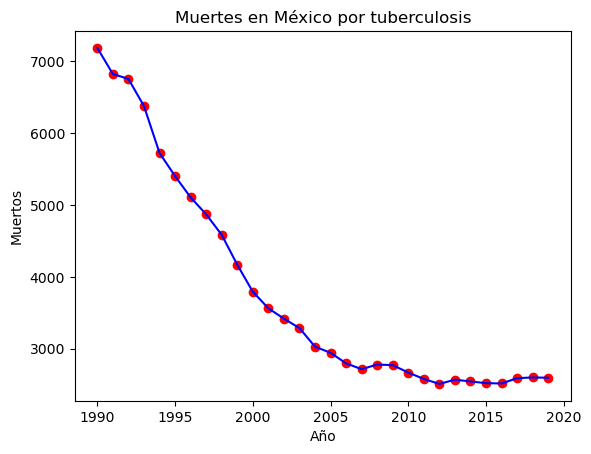

In [ ]:
#grafico 8
#definir variables para 	tuberculosis
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [8]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en México por tuberculosis')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

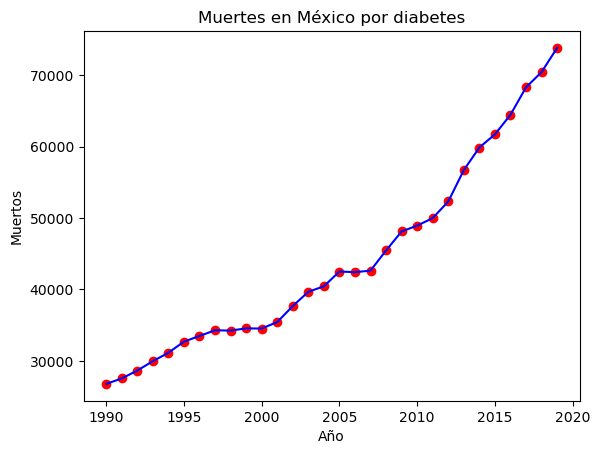

In [ ]:
#grafico 9
#definir variables para 	diabetes_mellitus
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [9]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en México por diabetes')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

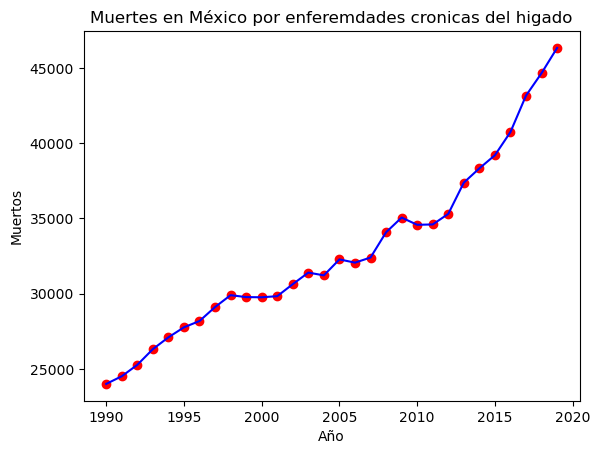

In [ ]:
#grafico 10
#definir variables para 	chronic_liver_diseases
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [10]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en México por enferemdades cronicas del higado')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

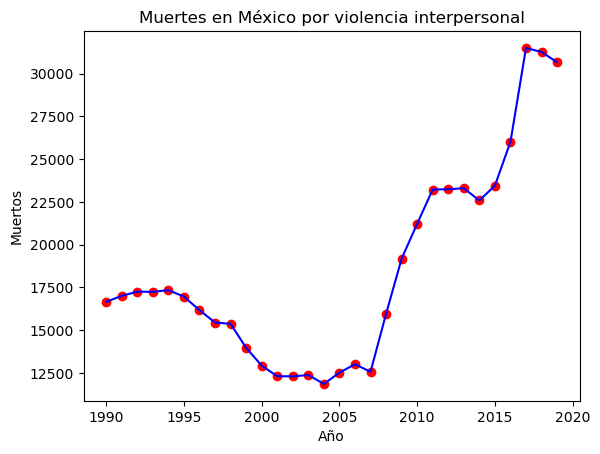

In [ ]:
#grafico 11
#definir variables para 	interpersonal_violence
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [11]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en México por violencia interpersonal')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

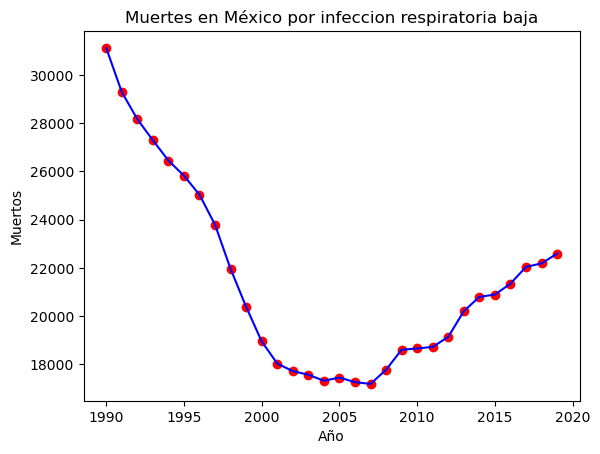

In [ ]:
#grafico 12
#definir variables para 	lower_respiratory_infections
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [12]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en México por infeccion respiratoria baja')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#### 6.3.2.- Para Chile

In [ ]:
df_chi.head(2)

,year,alzheimer's_diesease,nutritional_deficiency,cardiovascular_diseases,drowning,conflict_and_terrorism,road_injuries,chronic_respiratory_diseases,tuberculosis,diabetes_mellitus,chronic_liver_diseases,interpersonal_violence,lower_respiratory_infections
country,,,,,,,,,,,,,
Chile,1990,1328.0,190.0,22267.0,496.0,8.0,2104.0,2781.0,993.0,1525.0,3930.0,1156.0,6387.0
Chile,1991,1389.0,188.0,21594.0,489.0,16.0,2075.0,2757.0,873.0,1548.0,3652.0,1107.0,6181.0


### Plantilla de gráficos

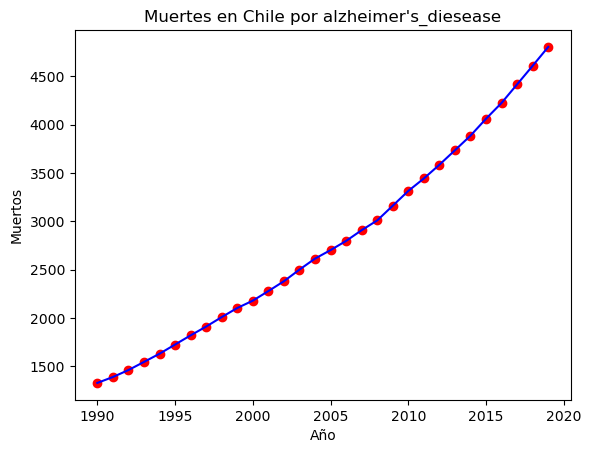

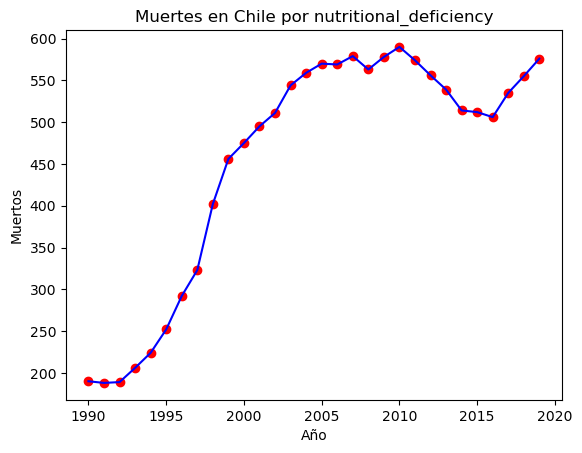

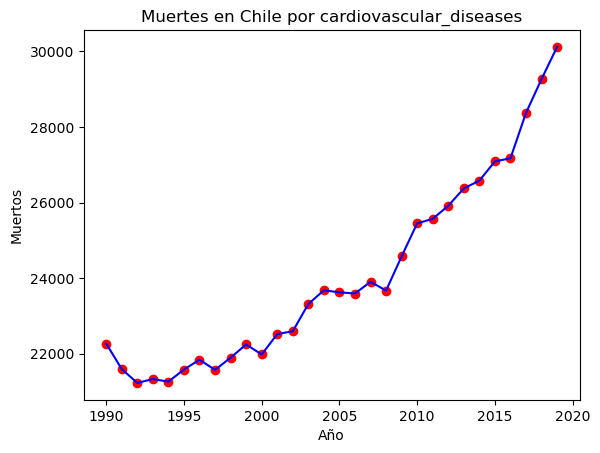

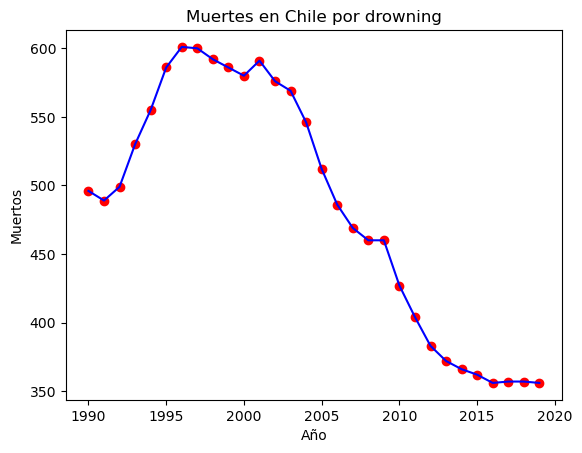

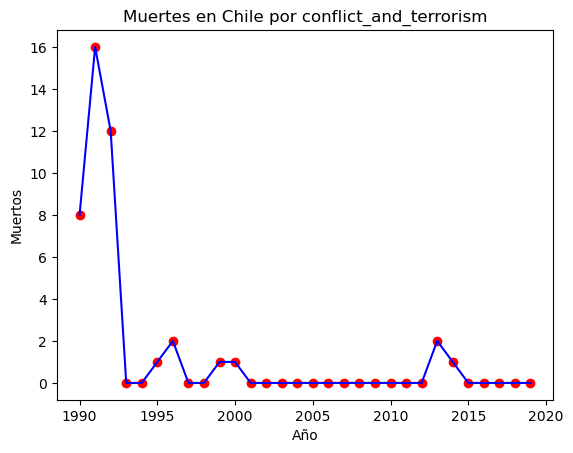

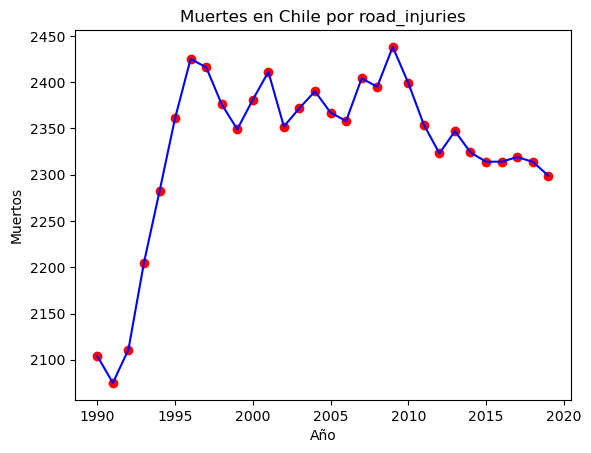

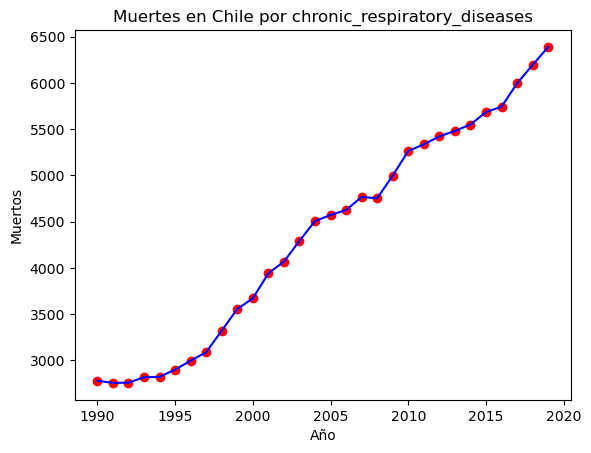

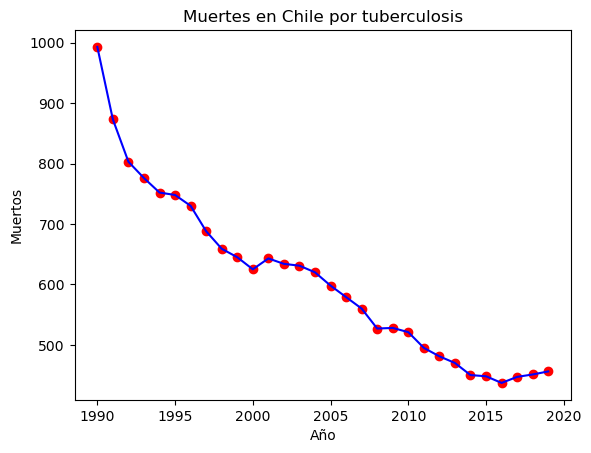

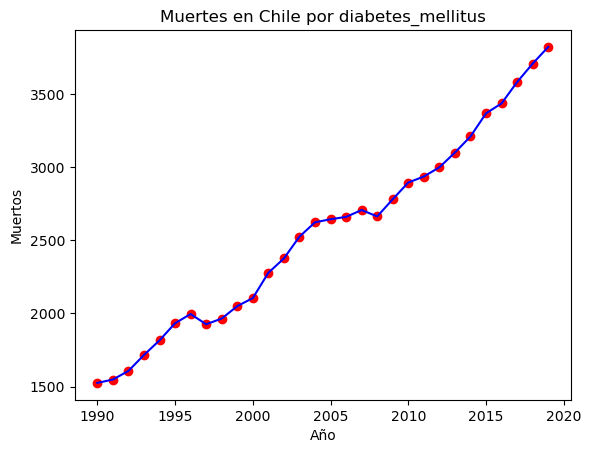

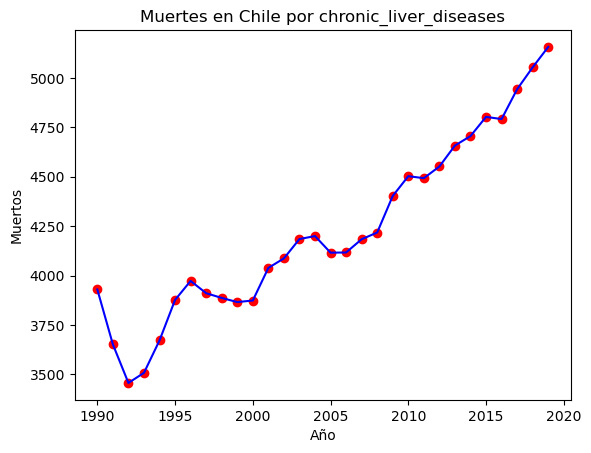

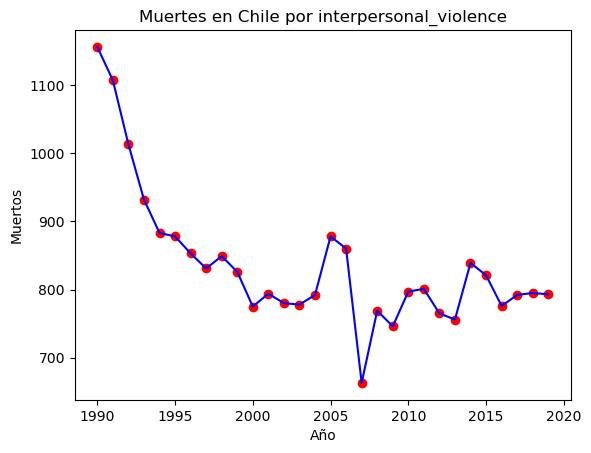

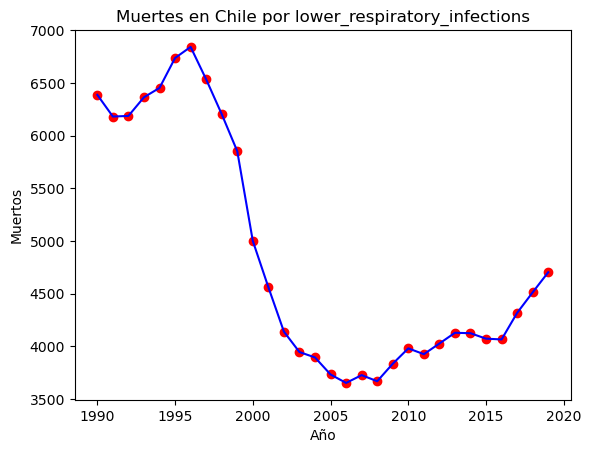

In [ ]:
#Graficos para Chile

# Lista de valores de i
j_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Lista de valores de r
s_values = ["alzheimer's_diesease", 'nutritional_deficiency', 'cardiovascular_diseases', 'drowning', "conflict_and_terrorism", "road_injuries", "chronic_respiratory_diseases", "tuberculosis", "diabetes_mellitus", "chronic_liver_diseases", "interpersonal_violence", "lower_respiratory_infections"]

# Iteramos sobre los valores de i y r
for j, s in zip(j_values, s_values):
    # Seleccionamos los datos correspondientes
    x_data = df_chi.iloc[:, [0]]
    y_data = df_chi.iloc[:, [j]]

    # Graficamos el gráfico de dispersión
    plt.plot(x_data, y_data, color='blue')
    plt.scatter(x_data, y_data, color='red')
    plt.title(f'Muertes en Chile por {s}')
    plt.xlabel('Año')
    plt.ylabel('Muertos')
    plt.show()

In [ ]:
#grafico 1
#definir variables para alzheimer's_diesease
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [1]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por Alzhaimer')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 2
#definir variables para  nutritional_deficiency
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [2]]

# hacemos una primera comparacion con la variable
plt.plot(x2_m,y2_m, color='blue')
plt.scatter(x2_m , y2_m, color='red')
plt.title('Muertes en Chile por deficiencia nutricional')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 3
#definir variables para cardiovascular_diseases
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [3]]

# hacemos una primera comparacion con la variable
plt.plot(x3_m,y3_m, color='blue')
plt.scatter(x3_m , y3_m, color='red')
plt.title('Muertes en Chile por enfermedades cardiovasculares')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 4
#definir variables para drowning
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [4]]

# hacemos una primera comparacion con la variable
plt.plot(x4_m,y4_m, color='blue')
plt.scatter(x4_m , y4_m, color='red')
plt.title('Muertes en Chile por ahogamiento')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 5
#definir variables para 	conflict_and_terrorism
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [5]]

# hacemos una primera comparacion con la variable
plt.plot(x5_m,y5_m, color='blue')
plt.scatter(x5_m , y5_m, color='red')
plt.title('Muertes en Chile por conflictos y terrorismo')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 6
#definir variables para road_injuries
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [6]]

# hacemos una primera comparacion con la variable
plt.plot(x6_m,y6_m, color='blue')
plt.scatter(x6_m , y6_m, color='red')
plt.title('Muertes en Chile por accidentes de carretera')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 7
#definir variables para 	chronic_respiratory_diseases
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [7]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por enfermedades cronicas respitatorias')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 8
#definir variables para 	tuberculosis
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [8]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por tuberculosis')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 9
#definir variables para 	diabetes_mellitus
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [9]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por diabetes')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 10
#definir variables para 	chronic_liver_diseases
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [10]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por enferemdades cronicas del higado')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 11 esta repetida, se me fue:(
#definir variables para 	interpersonal_violence
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [11]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por violencia interpersonal')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

#grafico 12
#definir variables para 	lower_respiratory_infections
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [12]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por infeccion respiratoria baja')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

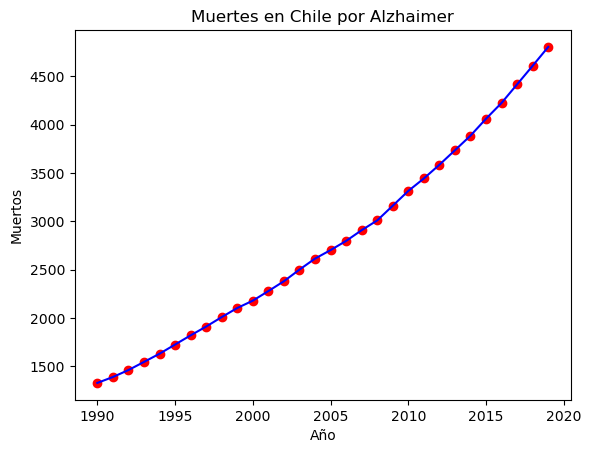

In [ ]:
#grafico 1
#definir variables para alzheimer's_diesease
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [1]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por Alzhaimer')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()



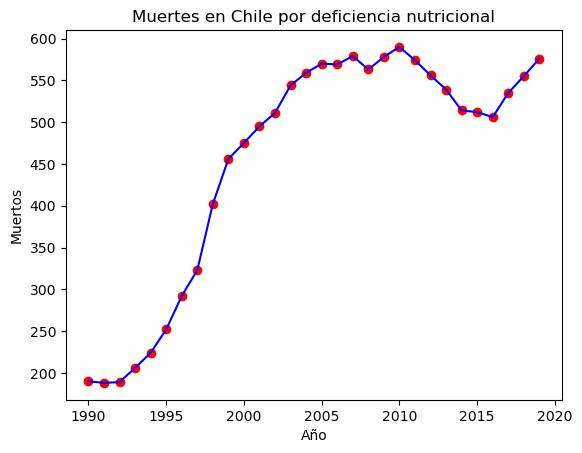

In [ ]:
#grafico 2
#definir variables para  nutritional_deficiency
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [2]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por deficiencia nutricional')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()



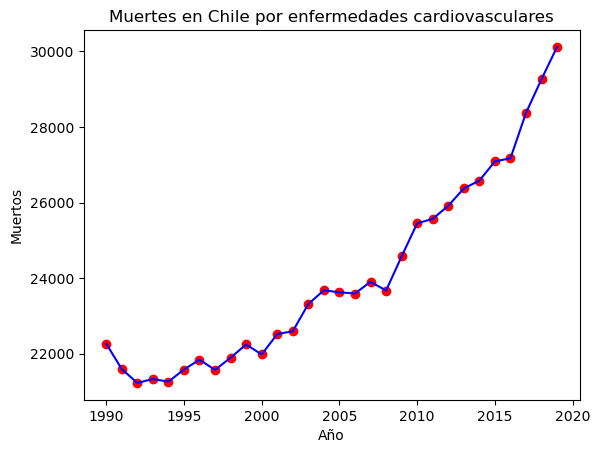

In [ ]:
#grafico 3
#definir variables para cardiovascular_diseases
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [3]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por enfermedades cardiovasculares')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()



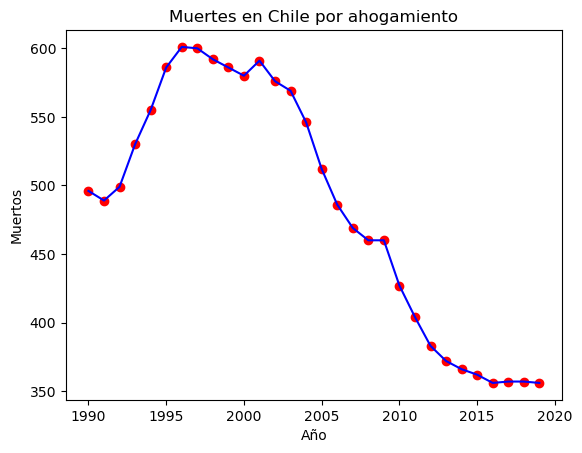

In [ ]:
#grafico 4
#definir variables para drowning
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [4]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por ahogamiento')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()



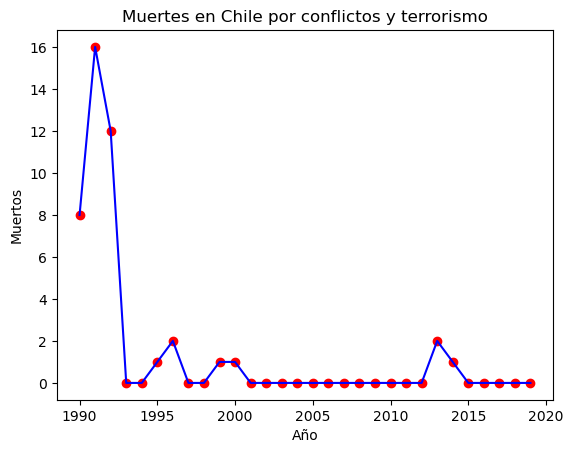

In [ ]:
#grafico 5
#definir variables para 	conflict_and_terrorism
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [5]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por conflictos y terrorismo')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()



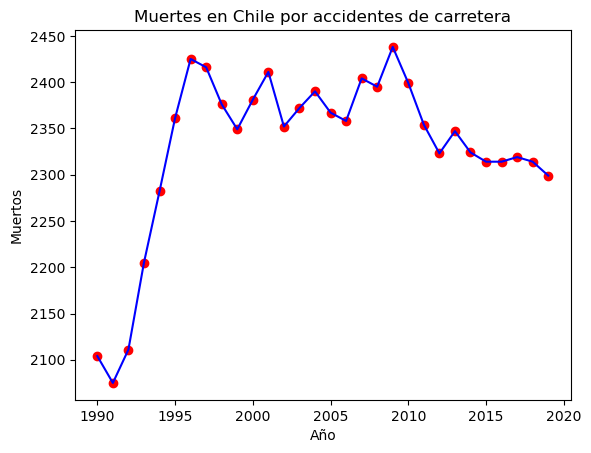

In [ ]:
#grafico 6
#definir variables para road_injuries
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [6]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por accidentes de carretera')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()



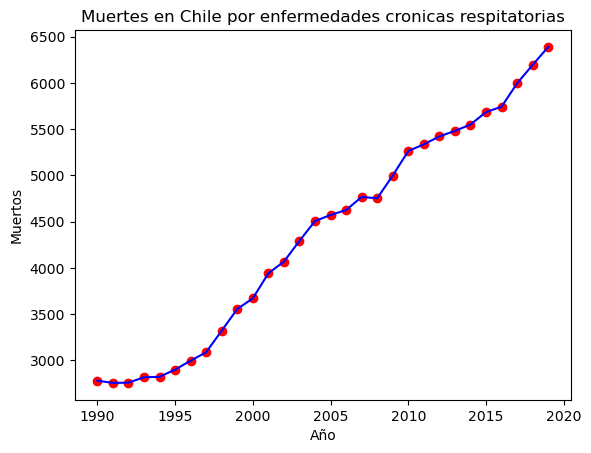

In [ ]:
#grafico 7
#definir variables para 	chronic_respiratory_diseases
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [7]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por enfermedades cronicas respitatorias')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()



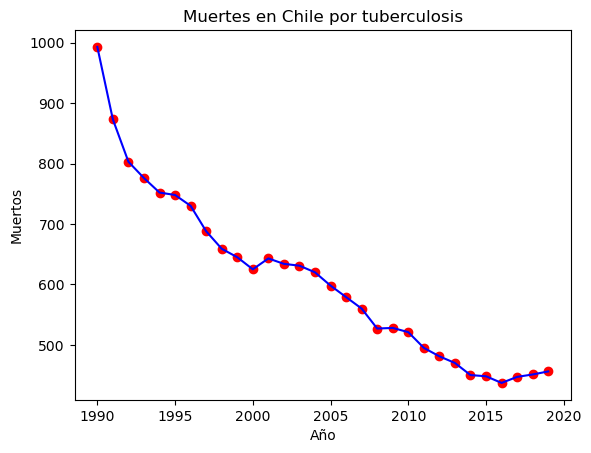

In [ ]:
#grafico 8
#definir variables para 	tuberculosis
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [8]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por tuberculosis')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()



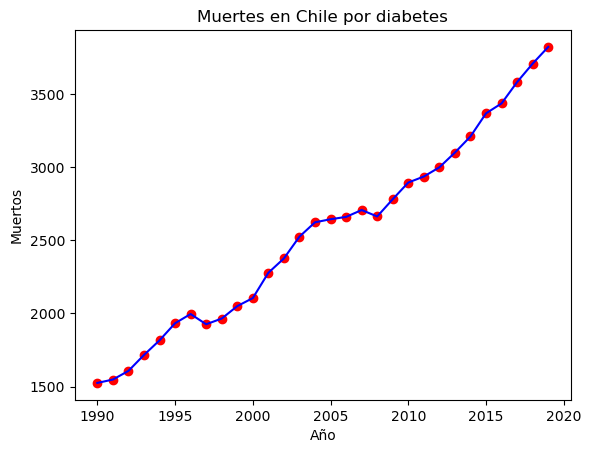

In [ ]:
#grafico 9
#definir variables para 	diabetes_mellitus
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [9]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por diabetes')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()



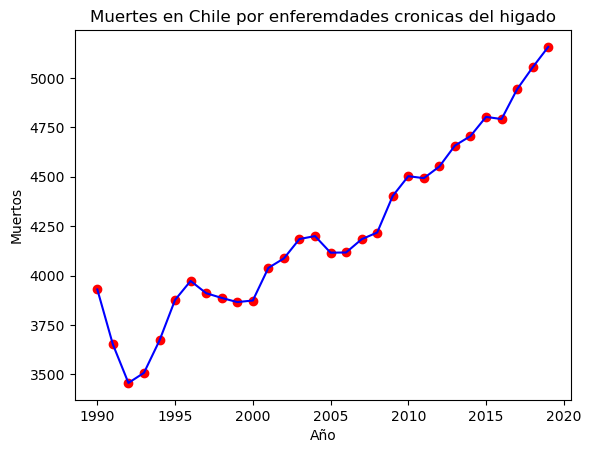

In [ ]:
#grafico 10
#definir variables para 	chronic_liver_diseases
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [10]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por enferemdades cronicas del higado')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()



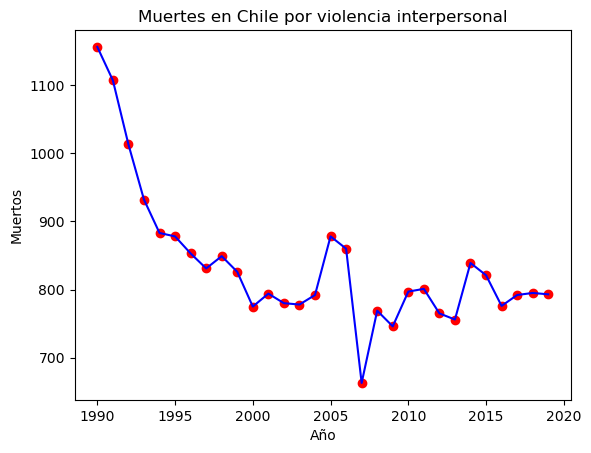

In [ ]:
#grafico 11
#definir variables para 	interpersonal_violence
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [11]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por violencia interpersonal')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()




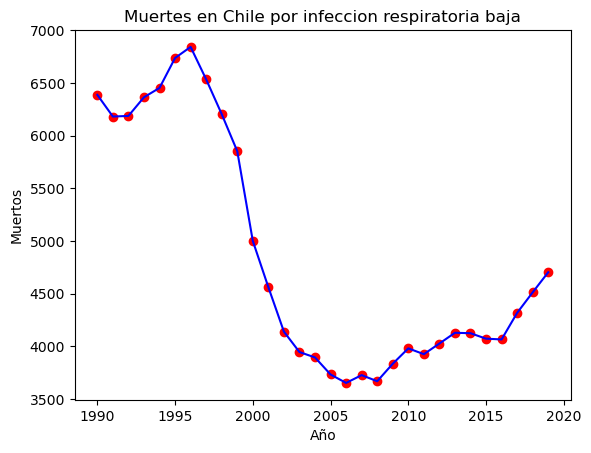

In [ ]:
#grafico 12
#definir variables para 	lower_respiratory_infections
x1_m = df_chi.iloc[:, [0]]
y1_m = df_chi.iloc[:, [12]]

# hacemos una primera comparacion con la variable
plt.plot(x1_m,y1_m, color='blue')
plt.scatter(x1_m , y1_m, color='red')
plt.title('Muertes en Chile por infeccion respiratoria baja')
plt.xlabel('Año')
plt.ylabel('Muertos')
plt.show()

### 6.4.- Comparaciones de graficos de dispersion

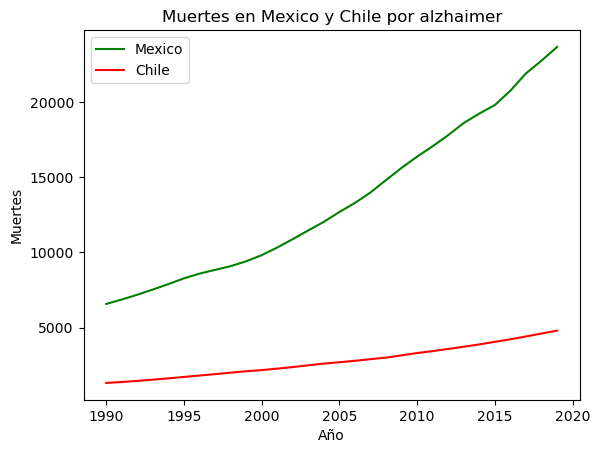

In [ ]:
#grafico 1, alzhaimer

#mexico
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [1]]
#chile
x1_c = df_chi.iloc[:, [0]]
y1_c = df_chi.iloc[:, [1]]

plt.plot(x1_m, y1_m, label='Mexico', color='green')#mexico
plt.plot(x1_c, y1_c, label='Chile', color='red')#chile
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.title('Muertes en Mexico y Chile por alzhaimer')
plt.legend()

plt.show()

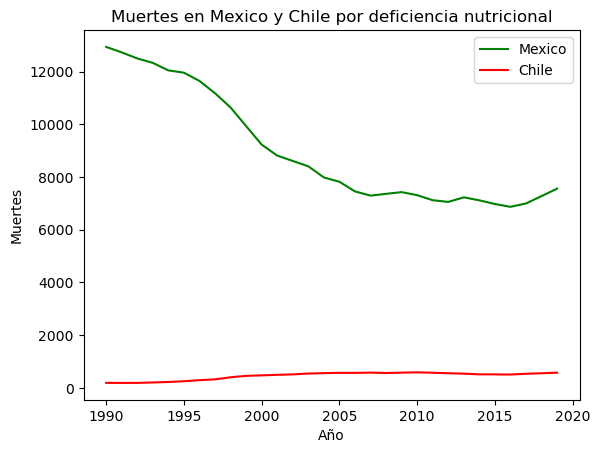

In [ ]:
#grafico 2, deficiencia nutricional

#mexico
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [2]]
#chile
x1_c = df_chi.iloc[:, [0]]
y1_c = df_chi.iloc[:, [2]]

plt.plot(x1_m, y1_m, label='Mexico', color='green')#mexico
plt.plot(x1_c, y1_c, label='Chile', color='red')#chile
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.title('Muertes en Mexico y Chile por deficiencia nutricional')
plt.legend()

plt.show()

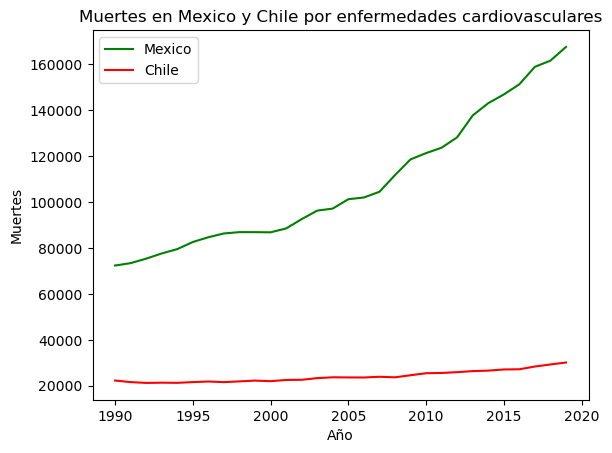

In [ ]:
#grafico 3, enfermedades cardiovasculares

#mexico
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [3]]
#chile
x1_c = df_chi.iloc[:, [0]]
y1_c = df_chi.iloc[:, [3]]

plt.plot(x1_m, y1_m, label='Mexico', color='green')#mexico
plt.plot(x1_c, y1_c, label='Chile', color='red')#chile
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.title('Muertes en Mexico y Chile por enfermedades cardiovasculares')
plt.legend()

plt.show()

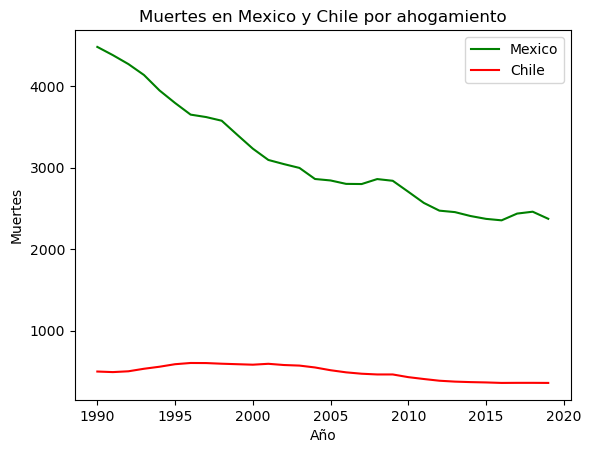

In [ ]:
#grafico 4, ahogamiento

#mexico
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [4]]
#chile
x1_c = df_chi.iloc[:, [0]]
y1_c = df_chi.iloc[:, [4]]

plt.plot(x1_m, y1_m, label='Mexico', color='green')#mexico
plt.plot(x1_c, y1_c, label='Chile', color='red')#chile
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.title('Muertes en Mexico y Chile por ahogamiento')
plt.legend()

plt.show()

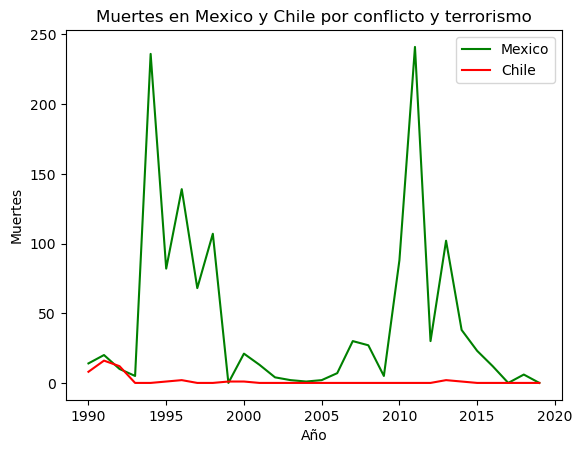

In [ ]:
#grafico 5, conflicto y terrorismo

#mexico
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [5]]
#chile
x1_c = df_chi.iloc[:, [0]]
y1_c = df_chi.iloc[:, [5]]

plt.plot(x1_m, y1_m, label='Mexico', color='green')#mexico
plt.plot(x1_c, y1_c, label='Chile', color='red')#chile
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.title('Muertes en Mexico y Chile por conflicto y terrorismo')
plt.legend()

plt.show()

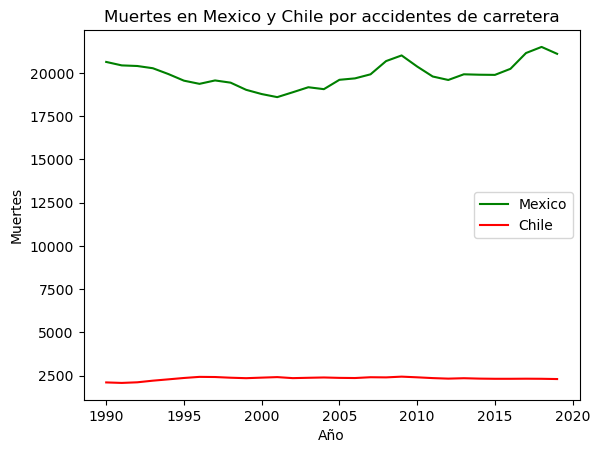

In [ ]:
#grafico 6, accidentes de carretera

#mexico
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [6]]
#chile
x1_c = df_chi.iloc[:, [0]]
y1_c = df_chi.iloc[:, [6]]

plt.plot(x1_m, y1_m, label='Mexico', color='green')#mexico
plt.plot(x1_c, y1_c, label='Chile', color='red')#chile
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.title('Muertes en Mexico y Chile por accidentes de carretera')
plt.legend()

plt.show()

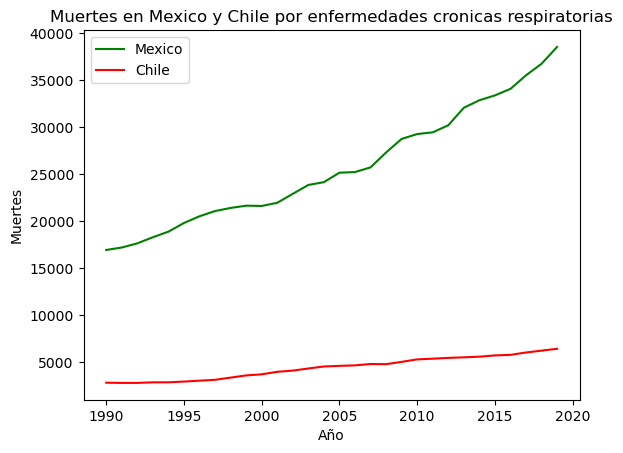

In [ ]:
#grafico 7, enfermedades cronicas respiratorias

#mexico
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [7]]
#chile
x1_c = df_chi.iloc[:, [0]]
y1_c = df_chi.iloc[:, [7]]

plt.plot(x1_m, y1_m, label='Mexico', color='green')#mexico
plt.plot(x1_c, y1_c, label='Chile', color='red')#chile
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.title('Muertes en Mexico y Chile por enfermedades cronicas respiratorias')
plt.legend()

plt.show()

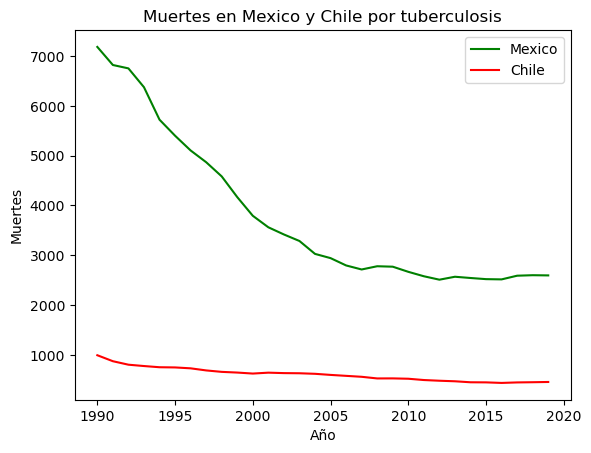

In [ ]:
#grafico 8, tuberculosis

#mexico
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [8]]
#chile
x1_c = df_chi.iloc[:, [0]]
y1_c = df_chi.iloc[:, [8]]

plt.plot(x1_m, y1_m, label='Mexico', color='green')#mexico
plt.plot(x1_c, y1_c, label='Chile', color='red')#chile
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.title('Muertes en Mexico y Chile por tuberculosis')
plt.legend()

plt.show()

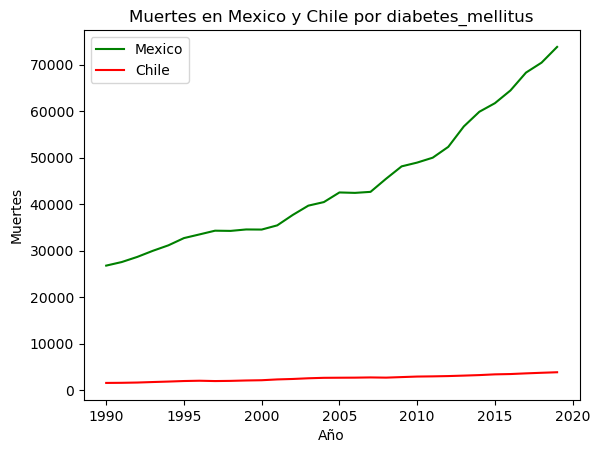

In [ ]:
#grafico 9, diabetes_mellitus

#mexico
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [9]]
#chile
x1_c = df_chi.iloc[:, [0]]
y1_c = df_chi.iloc[:, [9]]

plt.plot(x1_m, y1_m, label='Mexico', color='green')#mexico
plt.plot(x1_c, y1_c, label='Chile', color='red')#chile
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.title('Muertes en Mexico y Chile por diabetes_mellitus')
plt.legend()

plt.show()

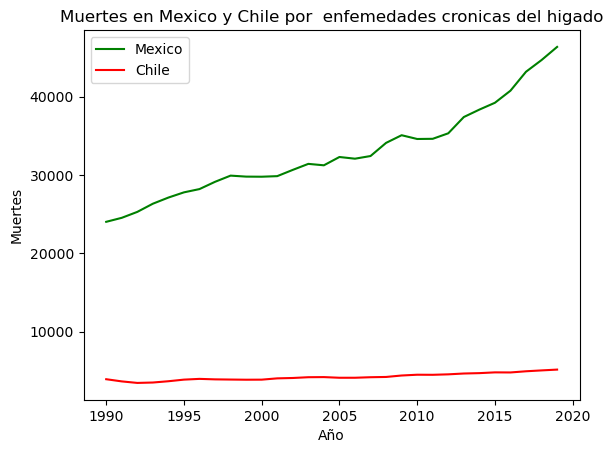

In [ ]:
#grafico 10, enfemedades cronicas del higado

#mexico
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [10]]
#chile
x1_c = df_chi.iloc[:, [0]]
y1_c = df_chi.iloc[:, [10]]

plt.plot(x1_m, y1_m, label='Mexico', color='green')#mexico
plt.plot(x1_c, y1_c, label='Chile', color='red')#chile
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.title('Muertes en Mexico y Chile por  enfemedades cronicas del higado')
plt.legend()

plt.show()

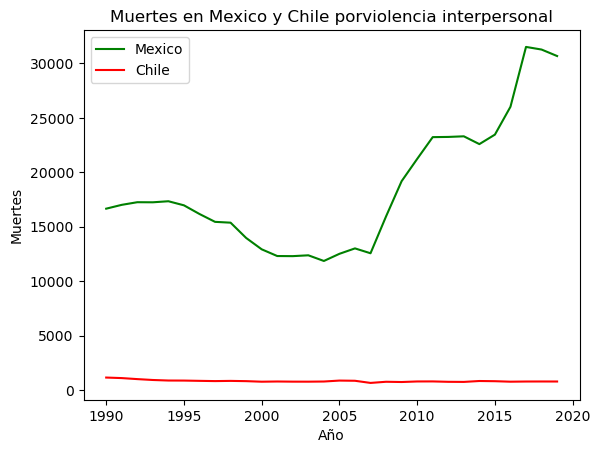

In [ ]:
#grafico 11, violencia interpersonal

#mexico
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [11]]
#chile
x1_c = df_chi.iloc[:, [0]]
y1_c = df_chi.iloc[:, [11]]

plt.plot(x1_m, y1_m, label='Mexico', color='green')#mexico
plt.plot(x1_c, y1_c, label='Chile', color='red')#chile
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.title('Muertes en Mexico y Chile porviolencia interpersonal')
plt.legend()

plt.show()

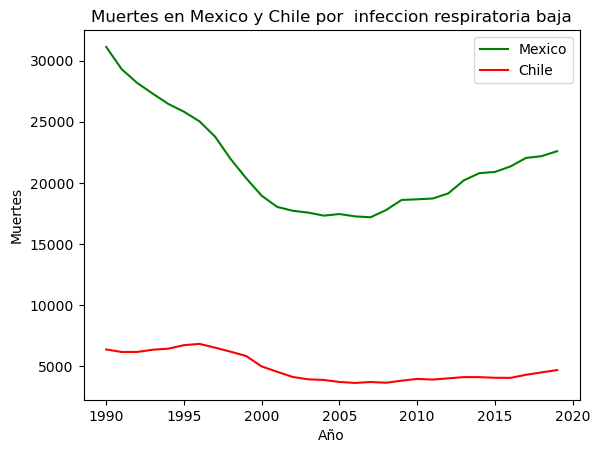

In [ ]:
#grafico 12, infeccion respiratoria baja

#mexico
x1_m = df_mex.iloc[:, [0]]
y1_m = df_mex.iloc[:, [12]]
#chile
x1_c = df_chi.iloc[:, [0]]
y1_c = df_chi.iloc[:, [12]]

plt.plot(x1_m, y1_m, label='Mexico', color='green')#mexico
plt.plot(x1_c, y1_c, label='Chile', color='red')#chile
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.title('Muertes en Mexico y Chile por  infeccion respiratoria baja')
plt.legend()

plt.show()

# Análisis de resultados

In [ ]:
#Graficos para Chile

# Lista de valores de i
j_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Lista de valores de r
s_values = ["alzheimer's_diesease", 'nutritional_deficiency', 'cardiovascular_diseases', 'drowning', "conflict_and_terrorism", "road_injuries", "chronic_respiratory_diseases", "tuberculosis", "diabetes_mellitus", "chronic_liver_diseases", "interpersonal_violence", "lower_respiratory_infections"]

# Iteramos sobre los valores de i y r
for j, s in zip(j_values, s_values):
    # Seleccionamos los datos correspondientes
    x_data = df_chi.iloc[:, [0]]
    y_data = df_chi.iloc[:, [j]]

    # Graficamos el gráfico de dispersión
    plt.plot(x_data, y_data, color='blue')
    plt.scatter(x_data, y_data, color='red')
    plt.title(f'Muertes en Chile por {s}')
    plt.xlabel('Año')
    plt.ylabel('Muertos')
    plt.show()

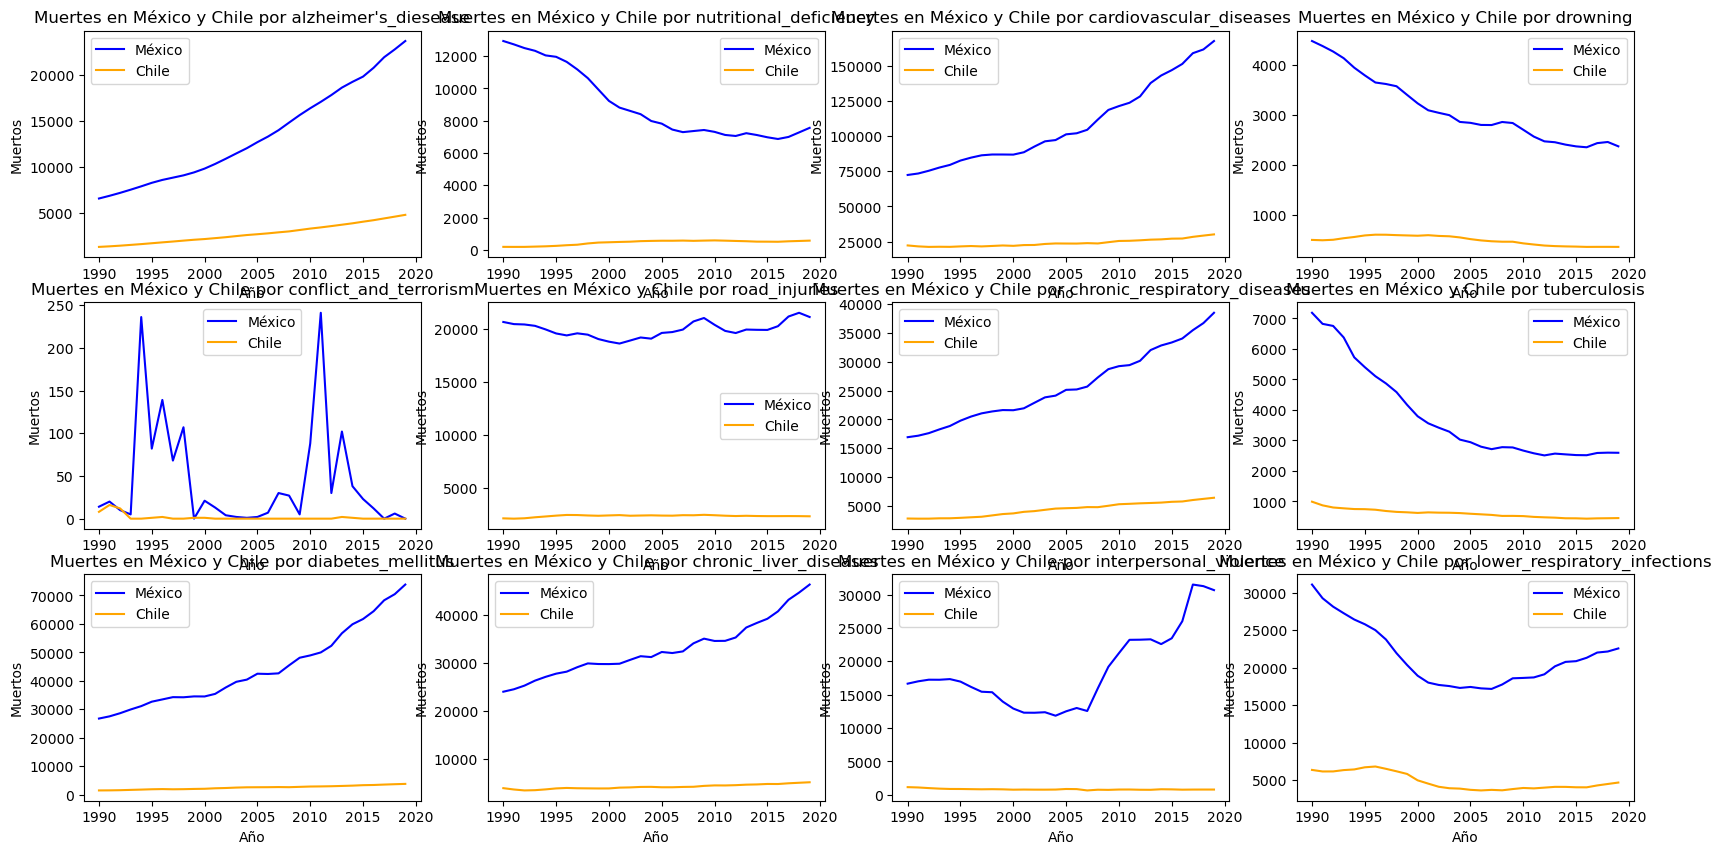

In [ ]:
# Lista de valores de i
i_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Lista de valores de r
r_values = ["alzheimer's_diesease", 'nutritional_deficiency', 'cardiovascular_diseases', 'drowning', "conflict_and_terrorism", "road_injuries", "chronic_respiratory_diseases", "tuberculosis", "diabetes_mellitus", "chronic_liver_diseases", "interpersonal_violence", "lower_respiratory_infections"]

# Lista de valores de j
j_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Lista de valores de s
s_values = ["alzheimer's_diesease", 'nutritional_deficiency', 'cardiovascular_diseases', 'drowning', "conflict_and_terrorism", "road_injuries", "chronic_respiratory_diseases", "tuberculosis", "diabetes_mellitus", "chronic_liver_diseases", "interpersonal_violence", "lower_respiratory_infections"]

# Crear una matriz de gráficos de 3x4
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))

# Iterar sobre los valores de i y r de la primera lista y los valores de j y s de la segunda lista al mismo tiempo
for i, r, j, s, ax in zip(i_values, r_values, j_values, s_values, axs.flatten()):
    # Seleccionar los datos correspondientes a México y a Chile
    x_data_mex = df_mex.iloc[:, [0]]
    y_data_mex = df_mex.iloc[:, [i]]
    x_data_chi = df_chi.iloc[:, [0]]
    y_data_chi = df_chi.iloc[:, [j]]

    # Graficar las dos líneas en el mismo eje y agregar un título, etiquetas para los ejes x e y y una leyenda para las líneas
    ax.plot(x_data_mex, y_data_mex, color='blue', label='México')
    ax.plot(x_data_chi, y_data_chi, color='orange', label='Chile')
    ax.set_title(f'Muertes en México y Chile por {r}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Muertos')
    ax.legend()

# Mostrar cada gráfico
plt.show()


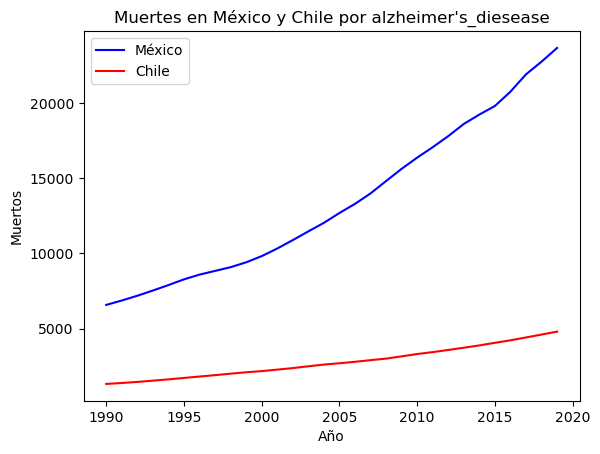

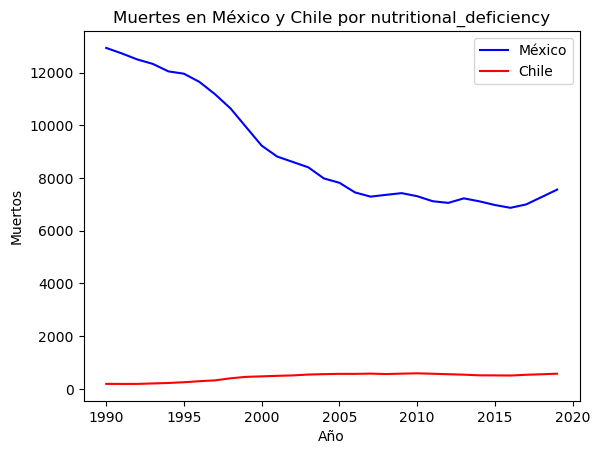

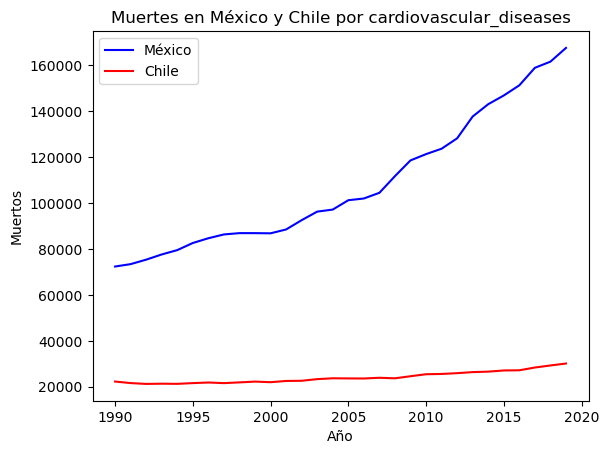

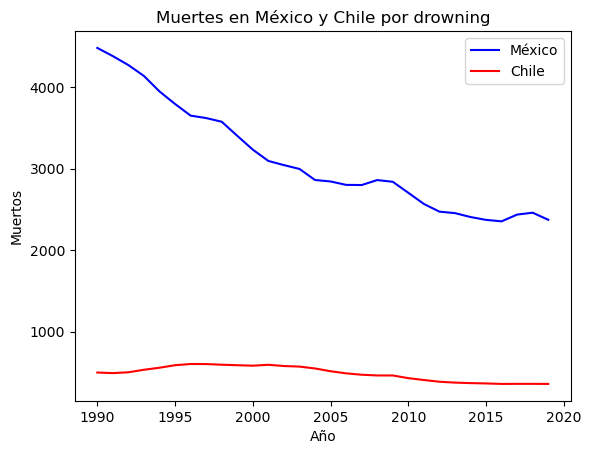

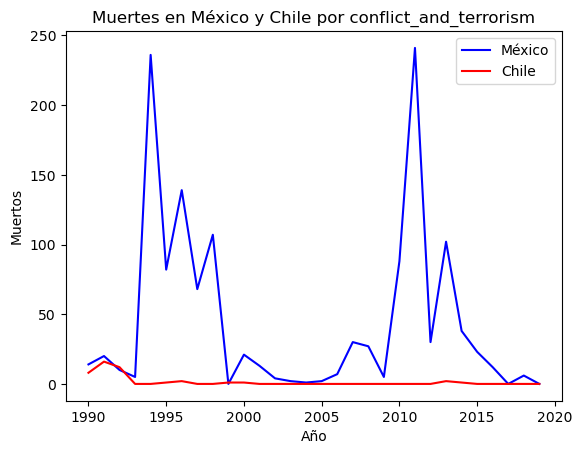

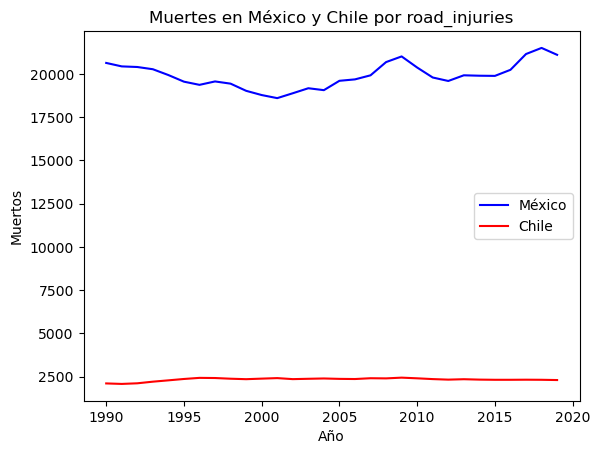

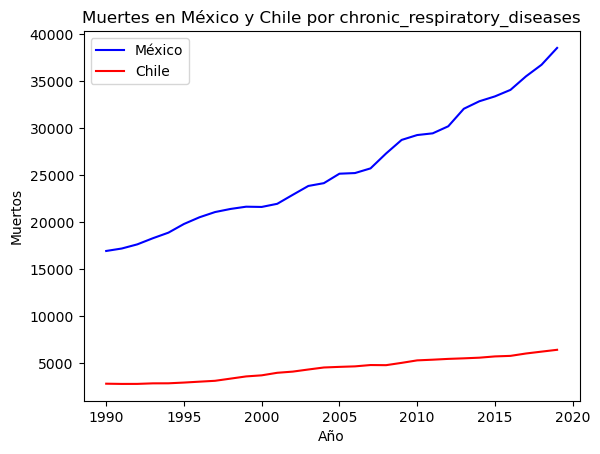

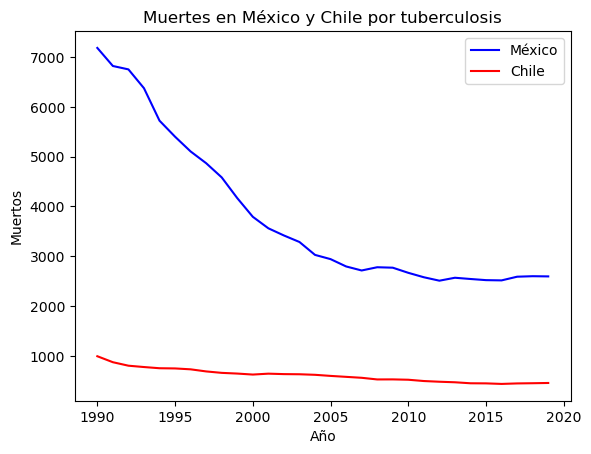

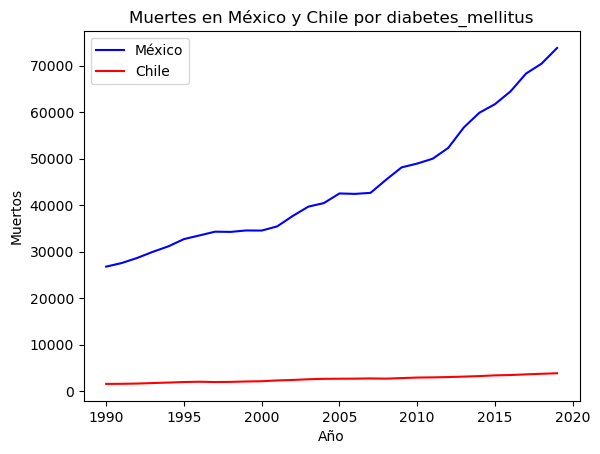

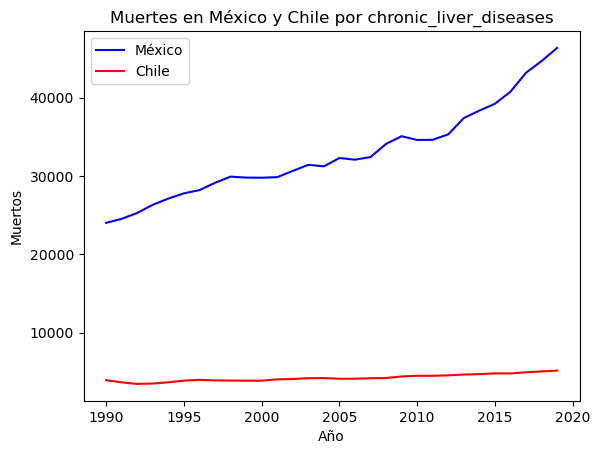

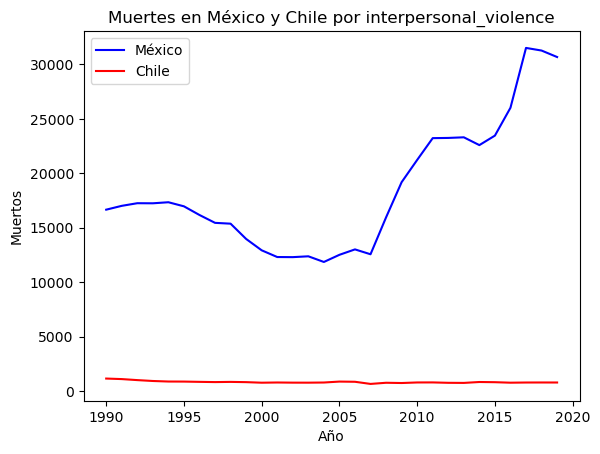

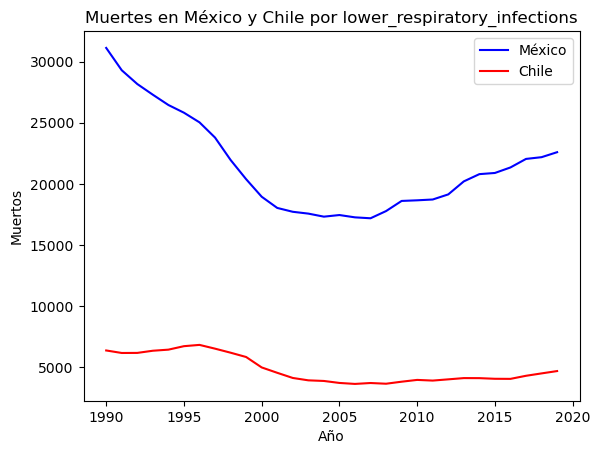

In [ ]:
# Lista de valores de i
i_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Lista de valores de r
r_values = ["alzheimer's_diesease", 'nutritional_deficiency', 'cardiovascular_diseases', 'drowning', "conflict_and_terrorism", "road_injuries", "chronic_respiratory_diseases", "tuberculosis", "diabetes_mellitus", "chronic_liver_diseases", "interpersonal_violence", "lower_respiratory_infections"]

# Iteramos sobre los valores de i y r
for i, r in zip(i_values, r_values):
    # Seleccionamos los datos correspondientes
    x_data = df_mex.iloc[:, [0]]
    y_data1 = df_mex.iloc[:, [i]]
    y_data2 = df_chi.iloc[:, [i]]

    # Graficamos las dos líneas en un solo gráfico
    plt.plot(x_data, y_data1, color='blue', label='México')
    plt.plot(x_data, y_data2, color='red', label='Chile')
    plt.title(f'Muertes en México y Chile por {r}')
    plt.xlabel('Año')
    plt.ylabel('Muertos')
    plt.legend()
    plt.show()


## hacerlo en lompio solo con los graficos de los ciclos